# BCG - TASK 2

## Sub-Task 1:

- Perform some exploratory data analysis. 
- Look into the data types, data statistics, specific parameters, and variable distributions. 

## 1. Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Reading the Dataset

* Importing client_data.csv and price_data.csv to a dataframes namely client_data and price_data respectively.

In [2]:
client_data = pd.read_csv('client_data.csv')
client_data.head(2)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  

[2 rows x 26 columns]

In [3]:
price_data = pd.read_csv('price_data.csv')
price_data.head(2)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0

## 3. Understaning the Dataset

- It is useful to first understand the data that you're dealing with along with the data types of each column. 
- The data types may dictate how you transform and engineer features.

## Five-Point Summary

# client_data:

In [4]:
print("Rows and Columns of Client Data :- ", client_data.shape)

Rows and Columns of Client Data :-  (14606, 26)


In [5]:
# Summary to all columns 

def check(client_data):
    l=[]
    columns=client_data.columns
    for col in columns:
        dtypes=client_data[col].dtypes
        nunique=client_data[col].nunique()
        sum_null=client_data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    client_check=pd.DataFrame(l)
    client_check.columns=['column','dtypes','nunique','sum_null']
    return client_check 
check(client_data)

column   dtypes  nunique  sum_null
0                               id   object    14606         0
1                    channel_sales   object        8         0
2                         cons_12m    int64    11065         0
3                     cons_gas_12m    int64     2112         0
4                  cons_last_month    int64     4751         0
5                       date_activ   object     1796         0
6                         date_end   object      368         0
7                  date_modif_prod   object     2129         0
8                     date_renewal   object      386         0
9                forecast_cons_12m  float64    13993         0
10              forecast_cons_year    int64     4218         0
11        forecast_discount_energy  float64       12         0
12         forecast_meter_rent_12m  float64     3528         0
13  forecast_price_energy_off_peak  float64      516         0
14      forecast_price_energy_peak  float64      329         0
15     forecast_price_pow_off_peak  float64       41         0
16                         has_gas   object        2         0
17                        imp_cons  float64     7752         0
18            margin_gross_pow_ele  float64     2391         0
19              margin_net_pow_ele  float64     2391         0
20                     nb_prod_act    int64       10         0
21                      net_margin  float64    11965         0
22                 num_years_antig    int64       13         0
23                       origin_up   object        6         0
24                         pow_max  float64      698         0
25                           churn    int64        2         0

In [6]:
client_data.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [7]:
client_data.skew()

cons_12m                           5.997308
cons_gas_12m                       9.597530
cons_last_month                    6.391407
forecast_cons_12m                  7.155853
forecast_cons_year                16.587990
forecast_discount_energy           5.155098
forecast_meter_rent_12m            1.505148
forecast_price_energy_off_peak    -0.119586
forecast_price_energy_peak        -0.014331
forecast_price_pow_off_peak       -4.998772
imp_cons                          13.198799
margin_gross_pow_ele               4.472632
margin_net_pow_ele                 4.473326
nb_prod_act                        8.636878
net_margin                        36.569515
num_years_antig                    1.446214
pow_max                            5.786785
churn                              2.720715
dtype: float64

#### OBSERVATIONS:
1. Total number of features are 26
2. The features are having datatypes as Float, Int, object
3. There are 4 features related to date, it is better to convert them to datetime data type.
4. As we can see there is no missing values in client dataset.
5. We have highly skewed data, exhibited by the percentile values


# price_data:

In [8]:
print("Rows and Columns of Price Data :- ", price_data.shape)

Rows and Columns of Price Data :-  (193002, 8)


In [9]:
# Summary to all columns 

def check(price_data):
    l=[]
    columns=price_data.columns
    for col in columns:
        dtypes=price_data[col].dtypes
        nunique=price_data[col].nunique()
        sum_null=price_data[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    price_check=pd.DataFrame(l)
    price_check.columns=['column','dtypes','nunique','sum_null']
    return price_check 
check(price_data)

column   dtypes  nunique  sum_null
0                  id   object    16096         0
1          price_date   object       12         0
2  price_off_peak_var  float64     1853         0
3      price_peak_var  float64     1189         0
4  price_mid_peak_var  float64      711         0
5  price_off_peak_fix  float64       66         0
6      price_peak_fix  float64       31         0
7  price_mid_peak_fix  float64       28         0

In [10]:
price_data.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

In [11]:
price_data.skew()

price_off_peak_var   -0.311879
price_peak_var       -0.133292
price_mid_peak_var    0.365508
price_off_peak_fix   -2.889775
price_peak_fix        0.471709
price_mid_peak_fix    0.433076
dtype: float64

#### OBSERVATIONS:
1. Total number of features are 8
2. The features are having datatypes as Float, Object
2. As we can see there is no missing values in price dataset.
3. We have moderately skewed data, exhibited by the percentile values
4. Overall the price data looks good


# EDA

# client_data:

In [12]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [13]:
categorical_columns = client_data.dtypes[client_data.dtypes=='object'].index.tolist()
categorical_columns

['id',
 'channel_sales',
 'date_activ',
 'date_end',
 'date_modif_prod',
 'date_renewal',
 'has_gas',
 'origin_up']

In [14]:
numerical_columns = client_data.dtypes[client_data.dtypes==np.number].index.tolist()
numerical_columns

['forecast_cons_12m',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'net_margin',
 'pow_max']

* Values of "channel_sales" and "origin_up" are not understandable, so Its better to convert these features to numeric data type by LABEL ENCODING

In [15]:
# LABEL ENCODING 

from sklearn.preprocessing import LabelEncoder

channel_encoder = LabelEncoder()
client_data['channel_sales'] = channel_encoder.fit_transform(client_data['channel_sales'])
origin_encoder = LabelEncoder()
client_data['origin_up'] = origin_encoder.fit_transform(client_data['origin_up'])

In [16]:
# converting datetime feature to datetime data type

for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_data[f] = pd.to_datetime(client_data[f])

In [17]:
# convert datetime feature to datetime data type of YEAR

client_data['contract_start_year'] = client_data['date_activ'].dt.year
client_data['contract_end_year'] = client_data['date_end'].dt.year

In [18]:
# description of features having datetime as datatype

client_data[client_data.dtypes[client_data.dtypes=='datetime64[ns]'].index.tolist()].describe(datetime_is_numeric=True).T

count                          mean        min  \
date_activ       14606 2011-01-28 07:54:18.879912448 2003-05-09   
date_end         14606 2016-07-27 20:48:26.422018560 2016-01-28   
date_modif_prod  14606 2013-01-02 12:29:10.951663872 2003-05-09   
date_renewal     14606 2015-07-21 06:59:00.353279488 2013-06-26   

                                25%        50%        75%        max  
date_activ      2010-01-15 00:00:00 2011-03-04 2012-04-19 2014-09-01  
date_end        2016-04-27 06:00:00 2016-08-01 2016-10-31 2017-06-13  
date_modif_prod 2010-08-12 00:00:00 2013-06-19 2015-06-16 2016-01-29  
date_renewal    2015-04-17 00:00:00 2015-07-27 2015-10-29 2016-01-28

## Target Feature - Churn:

In [19]:
churn = client_data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

In [20]:
def plot_stacked_bars(dataframe, title_, size_=(18, 15), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        figsize=size_,
        rot=rot_,
        title=title_
    )
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

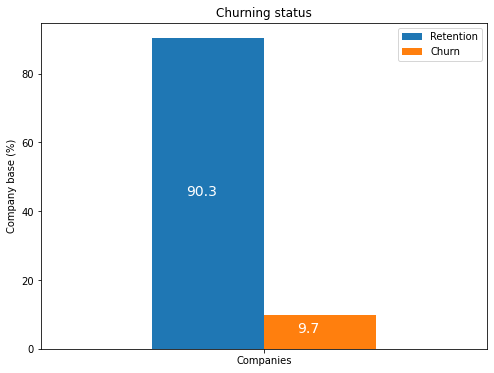


 ----- Value Counts -----

0    13187
1     1419
Name: churn, dtype: int64


In [21]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (8, 6), legend_=1)
print("\n ----- Value Counts -----\n")
print(client_data['churn'].value_counts())

#### INFERENCE: Around 9.7% of the customers change their providers.

## Consumption:

* Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [22]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [23]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

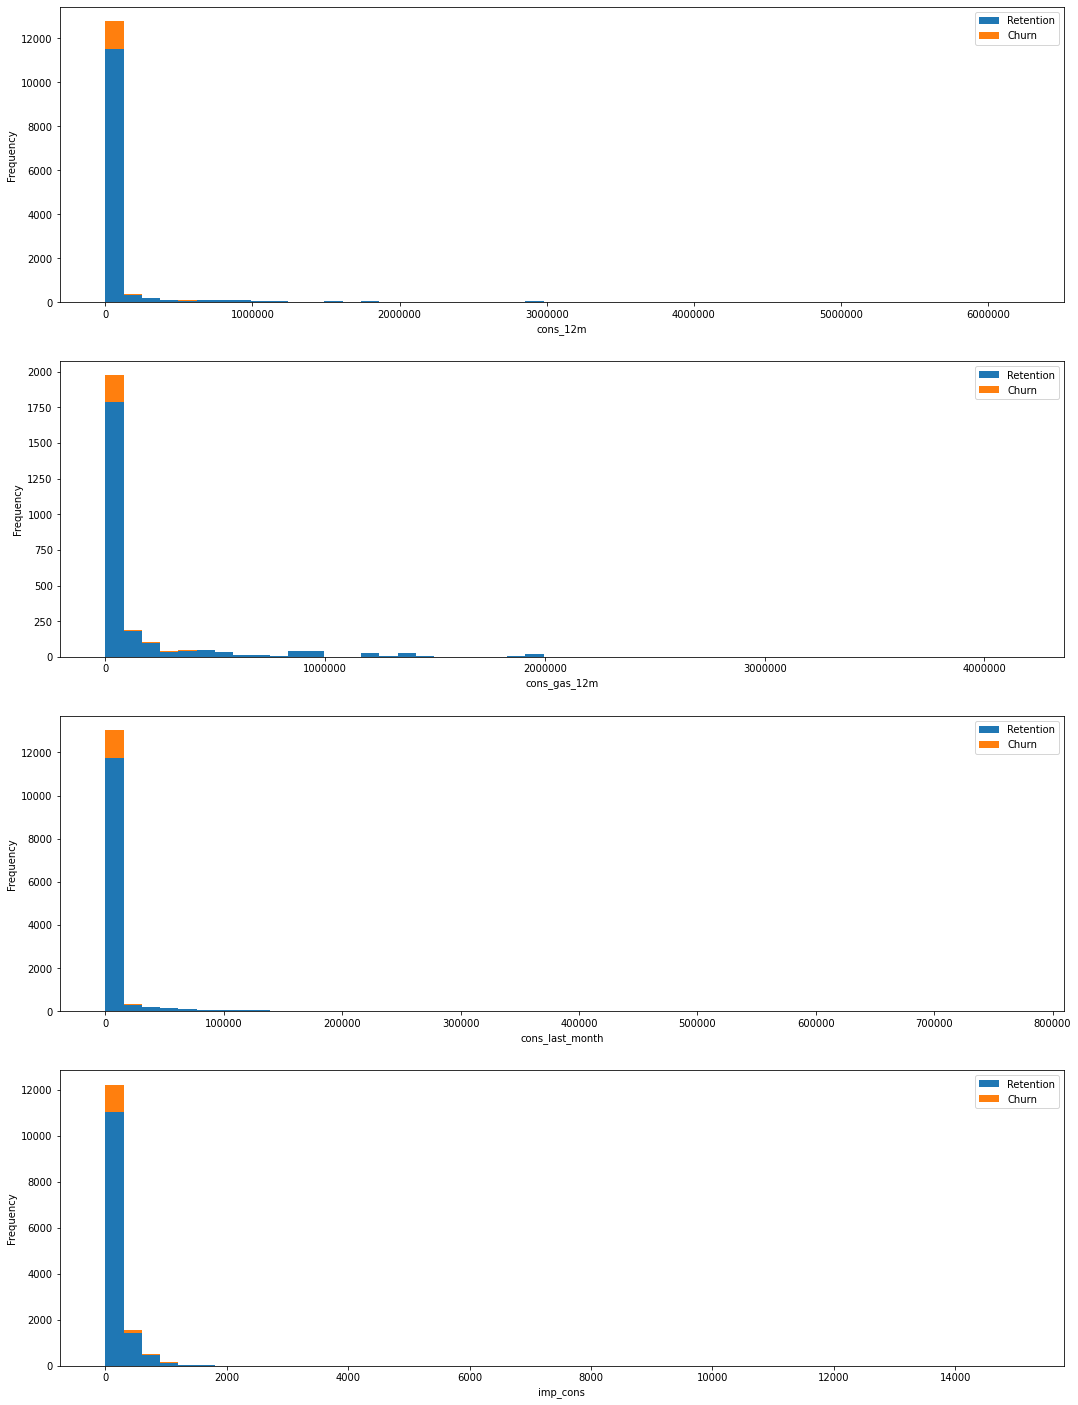

In [24]:
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

#### OBSERVATIONS:
1. The consumption data is clearly significantly positively skewed and has a very long right tail toward the upper values of the distribution.
2. This shows that there are outliers in this feature.

## Forecast:

In [25]:
forecast = client_data[["id", "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]]

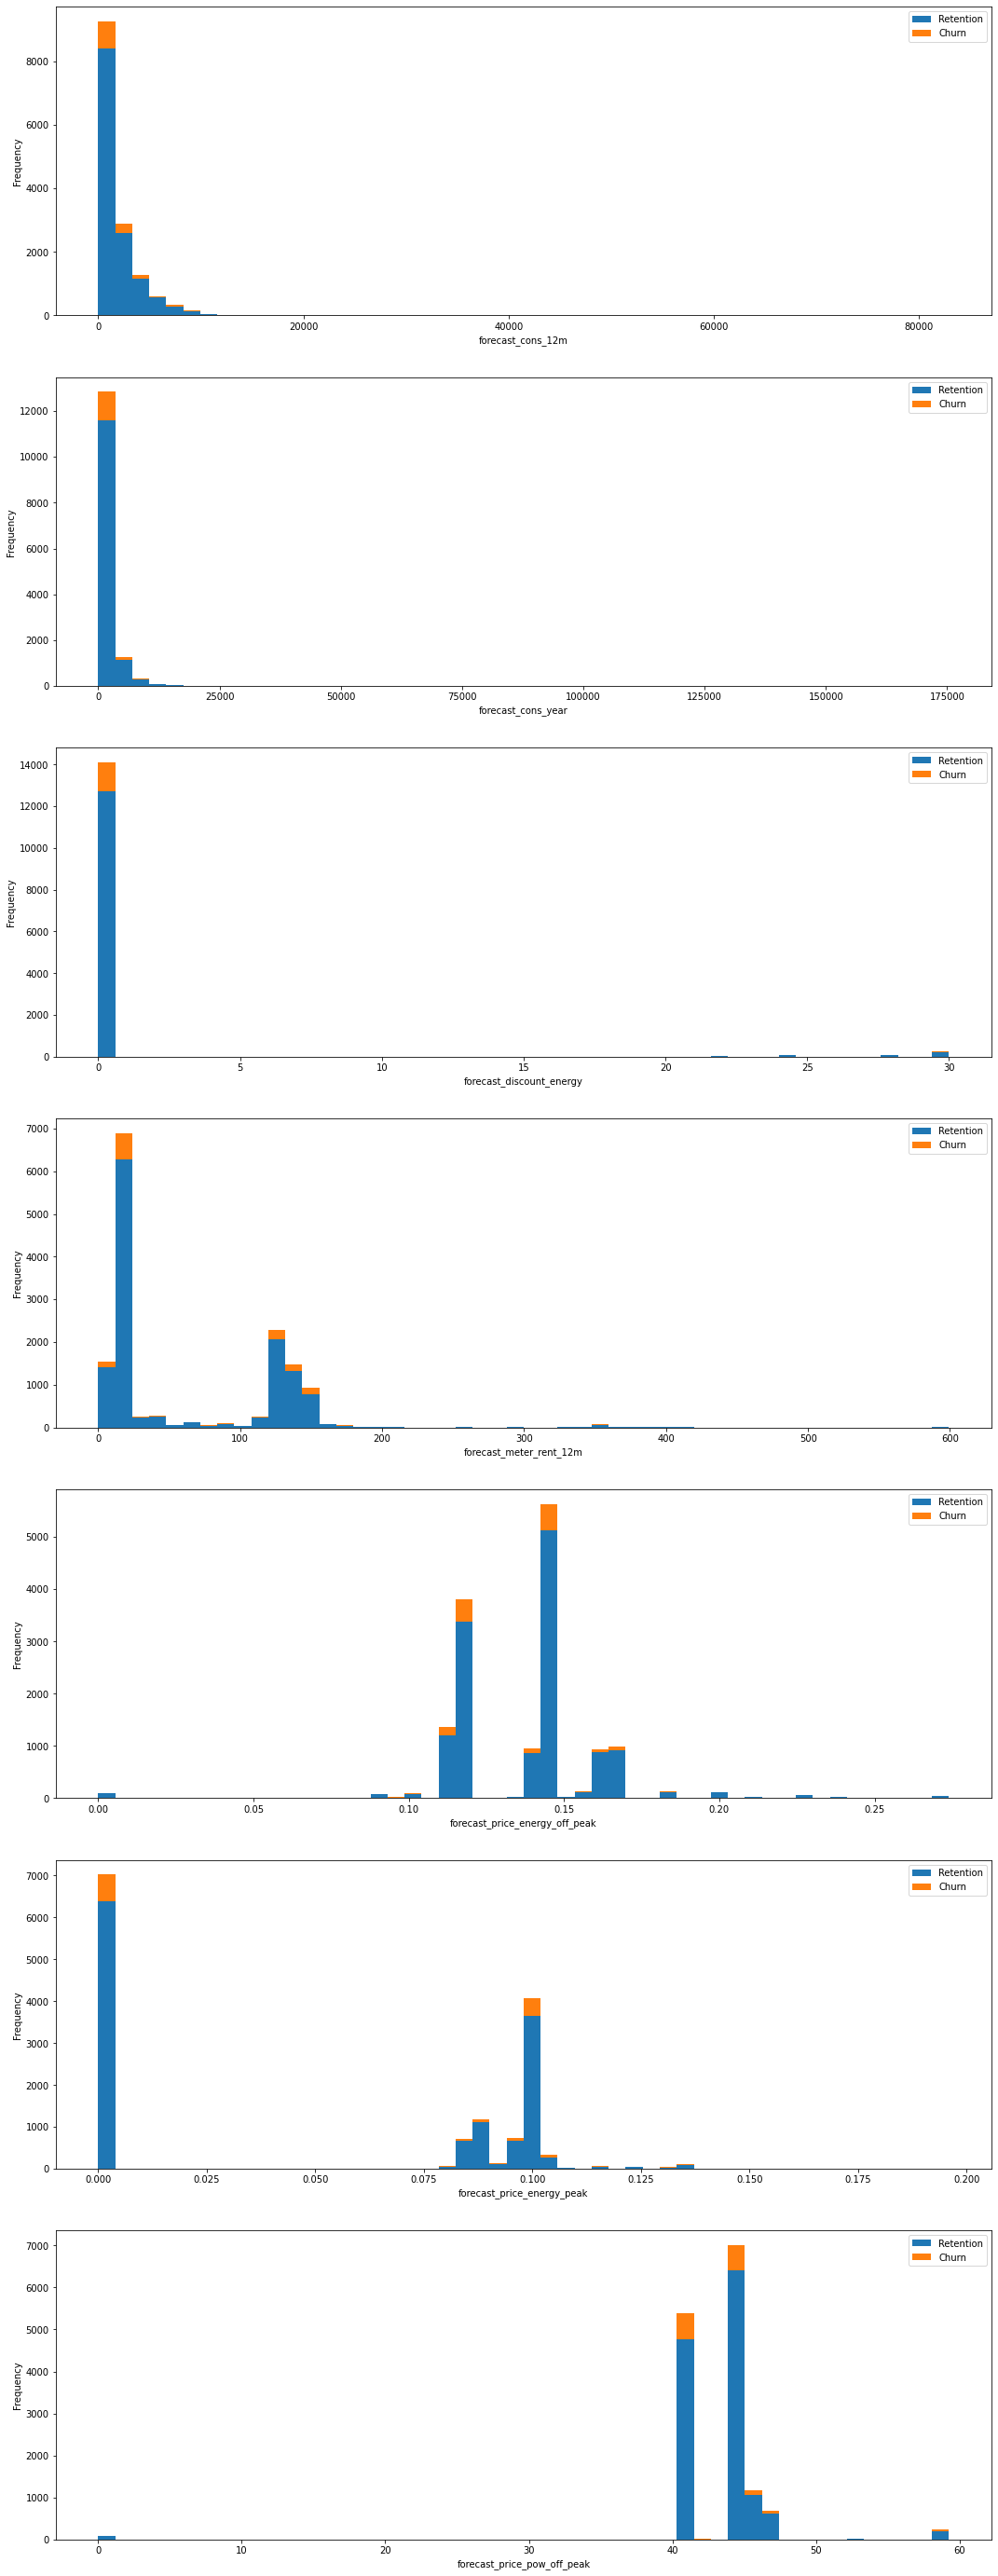

In [26]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_data, "forecast_cons_12m", axs[0])
plot_distribution(client_data, "forecast_cons_year", axs[1])
plot_distribution(client_data, "forecast_discount_energy", axs[2])
plot_distribution(client_data, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_data, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_data, "forecast_price_energy_peak", axs[5])
plot_distribution(client_data, "forecast_price_pow_off_peak", axs[6])

plt.savefig("View of Forecast.png", bbox_inches="tight")

#### OBSERVATIONS:
1. Seems that several variables are significantly positively skewed, giving a very long tail for the higher values, similar to the consumption plots, giving rise to outliers.

## Channel Sales

In [27]:
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = client_data[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)

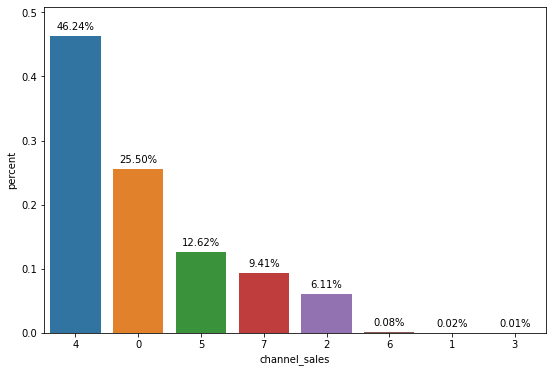

In [28]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='channel_sales', if_sort=True, gap_label_bar=0.01)

#### OBSERVATIONS:
1. As known, churning customers are distributed amonmg 5 channel_Sales.
2. As well as this, the value of MISSING(0) has a churn rate of 25.6%. 
3. Type 4 is the most common sales channel. Type 1, 3 and 6 sales channels are very rare.


- NOTE : MISSING indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

In [29]:
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable, if_sort=False, figsize=(9,6)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

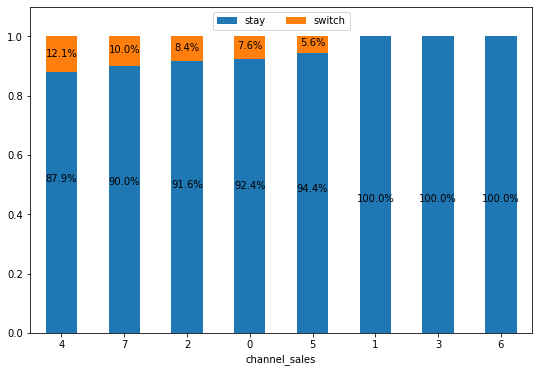

In [30]:
plot_stacked_bar_with_percent_label_by_churn(df=client_data, target_variable='channel_sales', if_sort=True)

#### OBSERVATION:
* For the customers from different sales channels, the proportion of churning customers ranges from 5.6% to 12.1% (excluding rare channels).


## Margin:

In [31]:
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

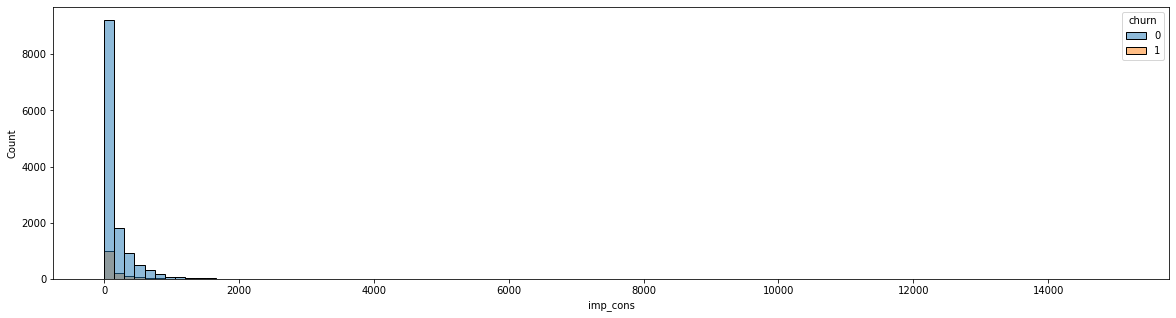

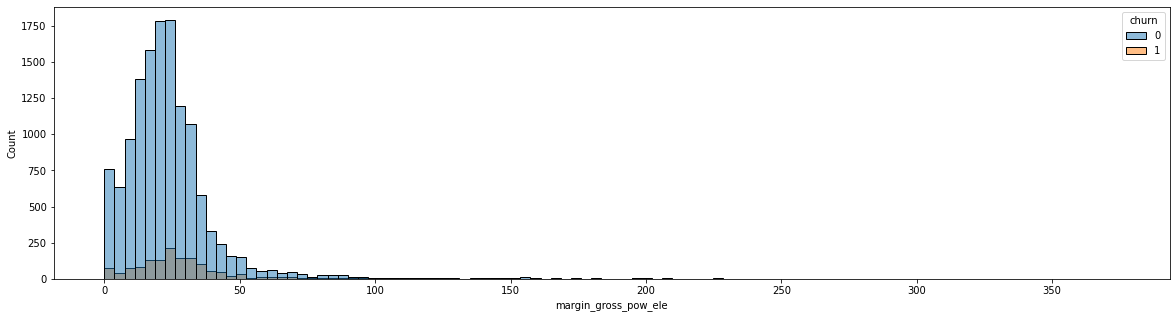

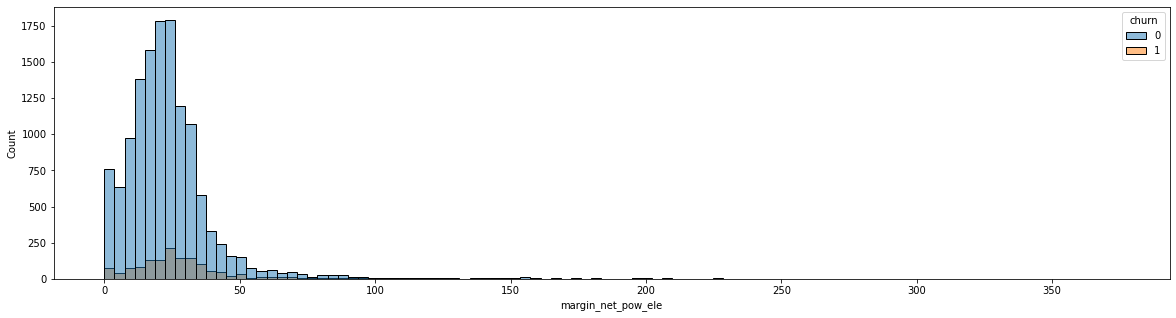

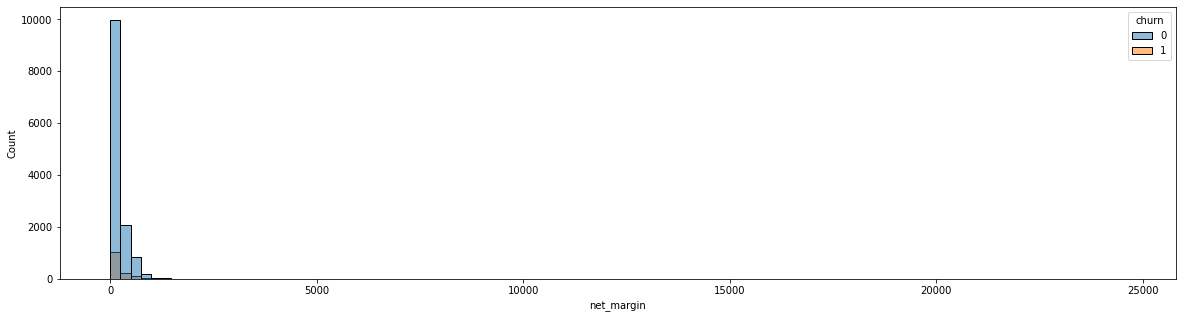

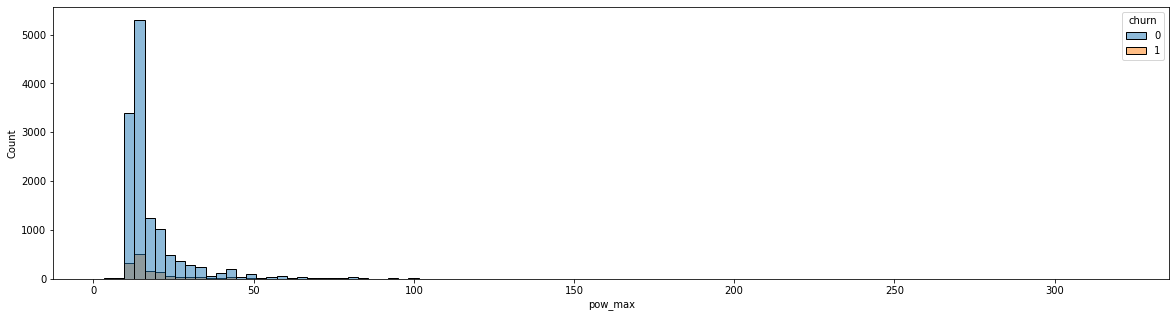

In [32]:
for attr in ['imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max',]:
    plot_histogram_by_churn(df=client_data, target_variable=attr)

#### OBSERVATIONS:
* We can also notice certain outliers in this data, and also depicts about the skewness

## Other Features:

#### origin_up:

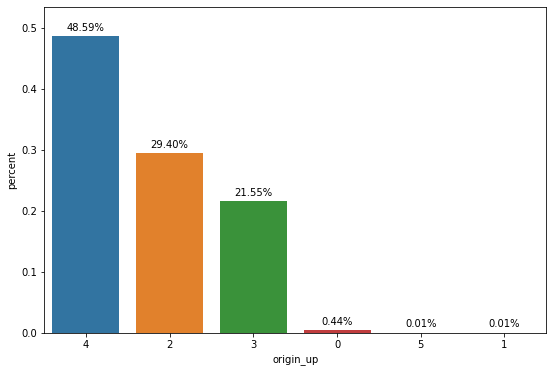

In [33]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='origin_up', if_sort=True, gap_label_bar=0.01)

#### OBSERVATION:
* For the customers who first subscribed to different electricity campaigns, the proportion of churning customers ranges from 6.0% to 12.6% (excluding type 1 and type 5).

#### pow_max:

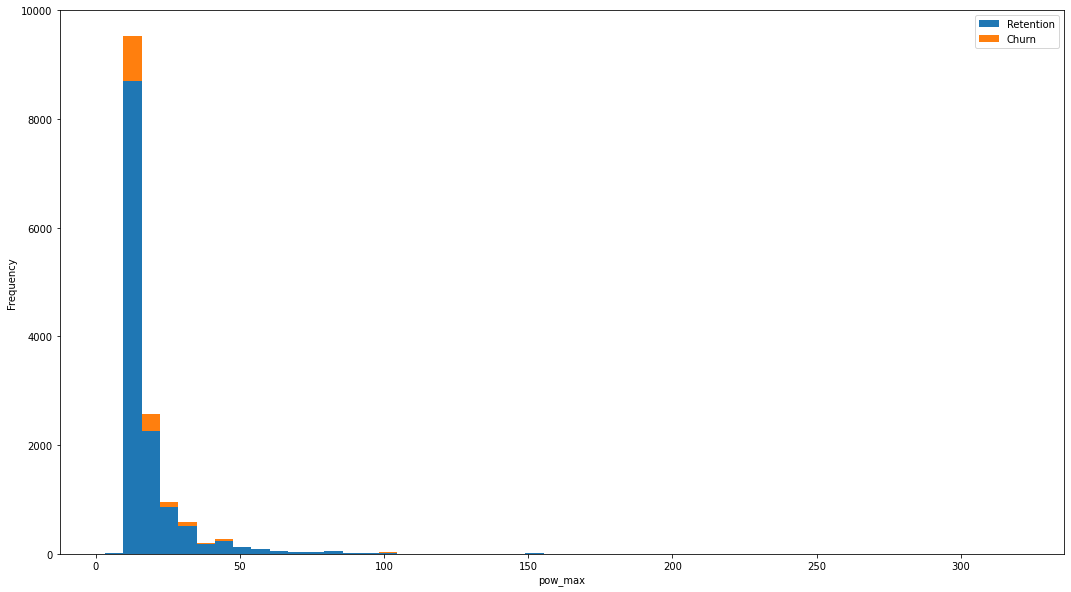

In [34]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(client_data, 'pow_max', axs)

#### has_gas:

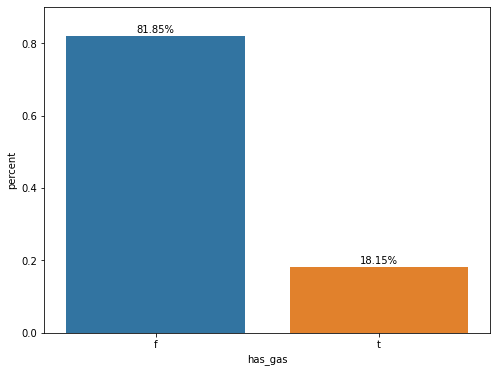

In [35]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='has_gas', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

#### OBSERVATION:
* Only 18.15% of the clients were also gas clients.

#### nb_prod_act:

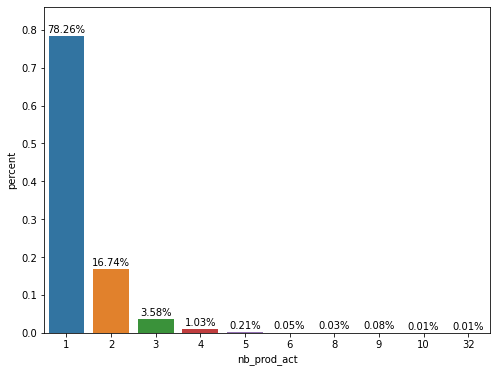

In [36]:
plot_bar_chart_with_percent_label(df=client_data, target_variable='nb_prod_act', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

#### OBSERVATION:
* Most customers only had 1 or 2 active products and services.

#### num_years_antig:

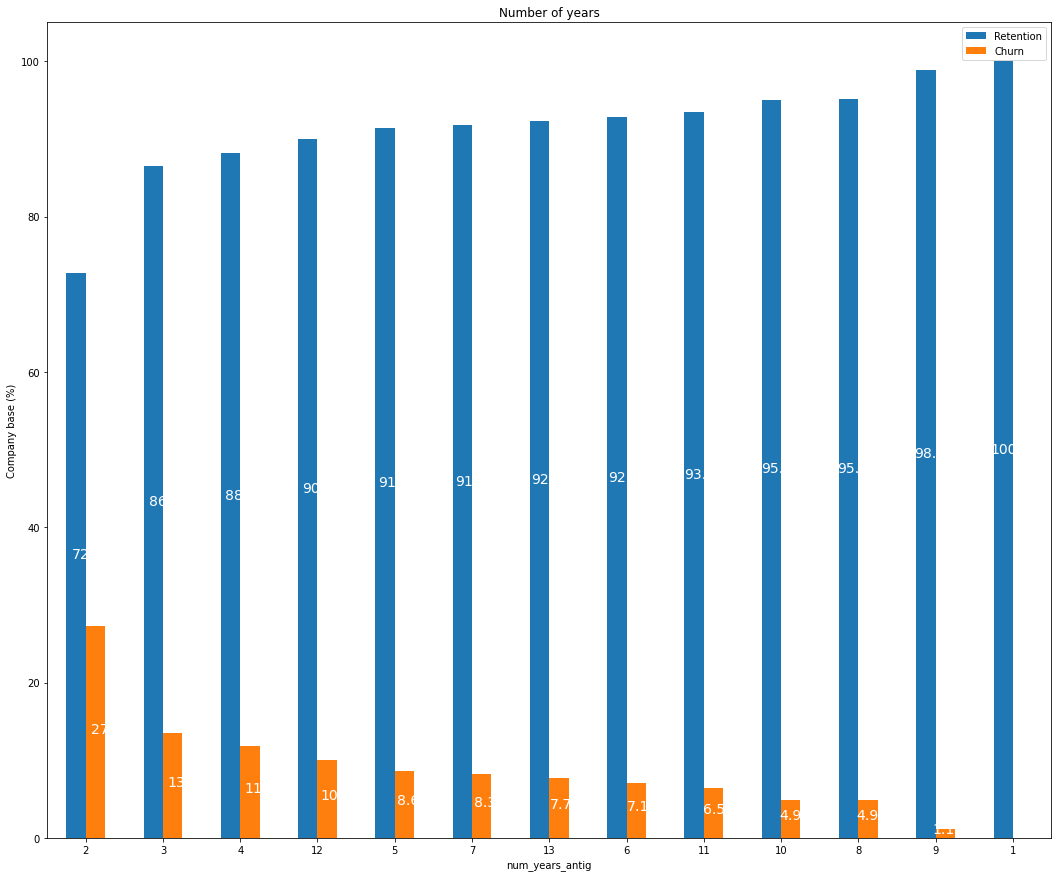

In [37]:
products = client_data.groupby([client_data["num_years_antig"], client_data["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
                                                                                      
plot_stacked_bars(years_antig_percentage, "Number of years")

#### OBSERVATION:
* Most cutomers stayed with the current providers for 3 to 6 years. Among these customers, it seems newer customers are more likely to switch to other providers

# Outliers Detection:

In [38]:
def preprocess_inputs(client_data):
    client_data = client_data.copy()
    
    return client_data

In [39]:
X = preprocess_inputs(client_data)
X.head(2)

id  channel_sales  cons_12m  cons_gas_12m  \
0  24011ae4ebbe3035111d65fa7c15bc57              4         0         54946   
1  d29c2c54acc38ff3c0614d0a653813dd              0      4660             0   

   cons_last_month date_activ   date_end date_modif_prod date_renewal  \
0                0 2013-06-15 2016-06-15      2015-11-01   2015-06-23   
1                0 2009-08-21 2016-08-30      2009-08-21   2015-08-31   

   forecast_cons_12m  ...  margin_gross_pow_ele  margin_net_pow_ele  \
0               0.00  ...                 25.44               25.44   
1             189.95  ...                 16.38               16.38   

   nb_prod_act  net_margin  num_years_antig  origin_up pow_max  churn  \
0            2      678.99                3          4  43.648      1   
1            1       18.89                6          2  13.800      0   

   contract_start_year  contract_end_year  
0                 2013               2016  
1                 2009               2016  

[2 rows x 28 columns]

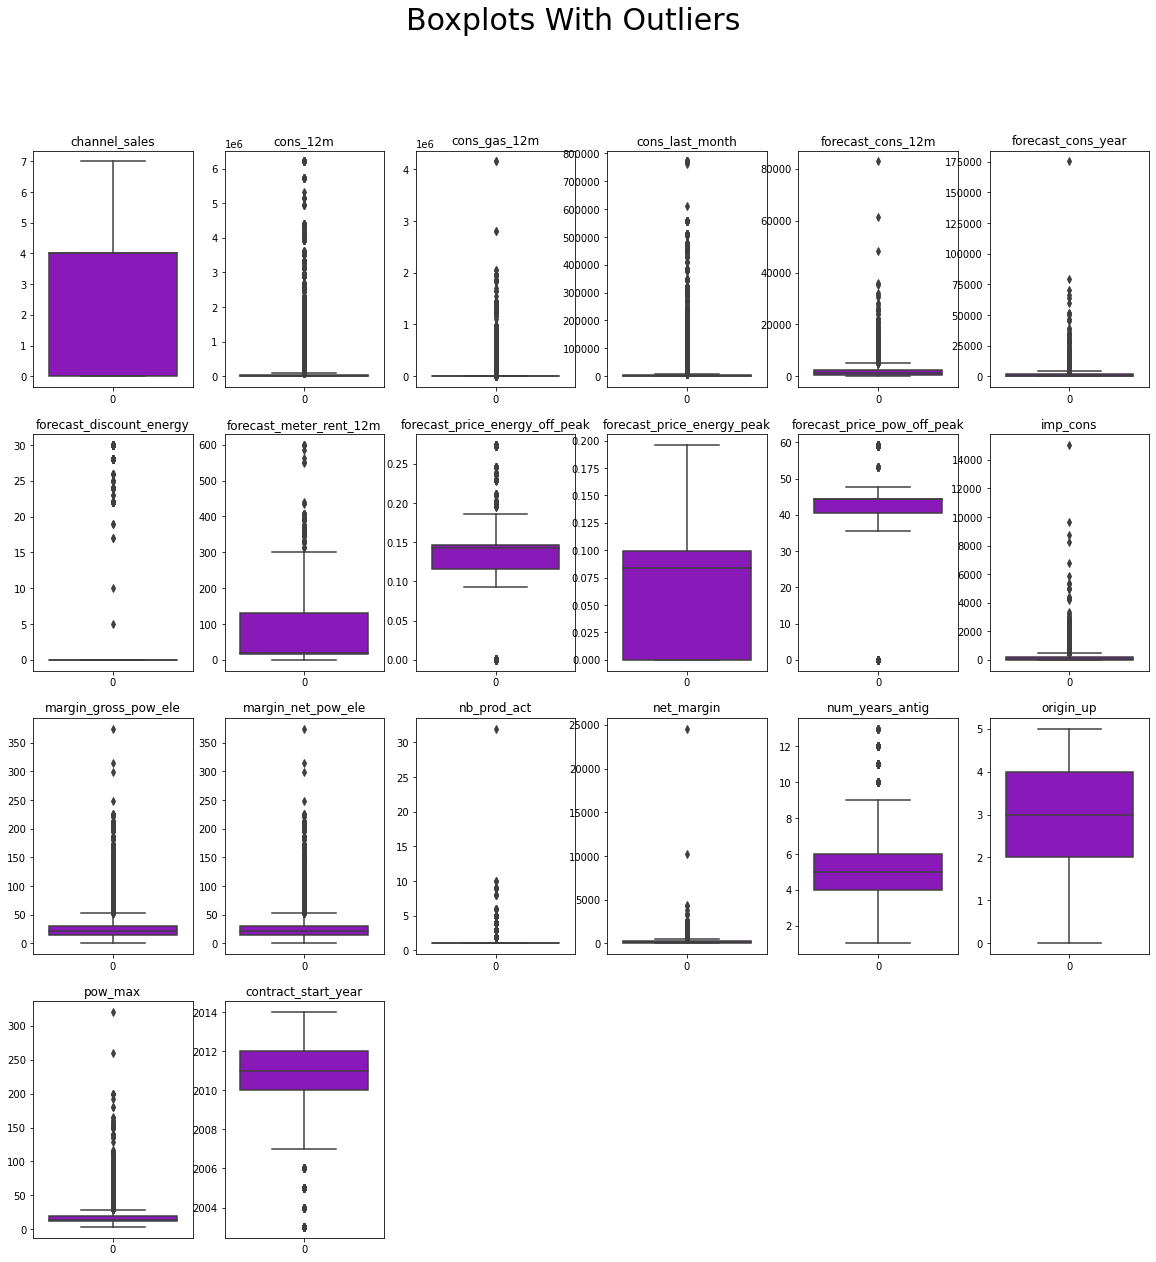

In [40]:
client_drop = X.drop(['id','churn','date_activ','date_end','date_modif_prod','date_renewal'], axis=1).copy()
nonbinary_columns = [column for column in client_drop.columns if len(client_drop[column].unique()) > 2]

plt.figure(figsize=(20, 20))

for i, column in enumerate(nonbinary_columns):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(data=client_drop[column], color='darkviolet')
    plt.title(column)

plt.suptitle("Boxplots With Outliers", size=30)
plt.show()

#### INFERENCE:
* All most every feature has its own outliers expect the features namely, **channel_sales,forecast_price_energy_peak,origin_up**

## Univariate Analysis

In [43]:
def countplot(data):
    for feature in client_data.columns.to_list():
        plt.figure(figsize=(12,5))
        ax=sns.countplot(data=data, x=feature, color="green")
        plt.xticks(rotation=90)
        plt.show()

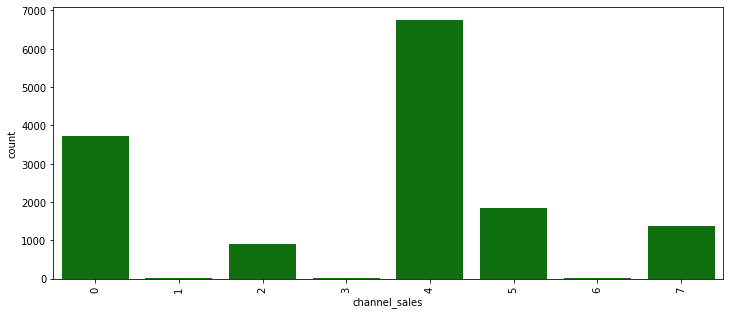

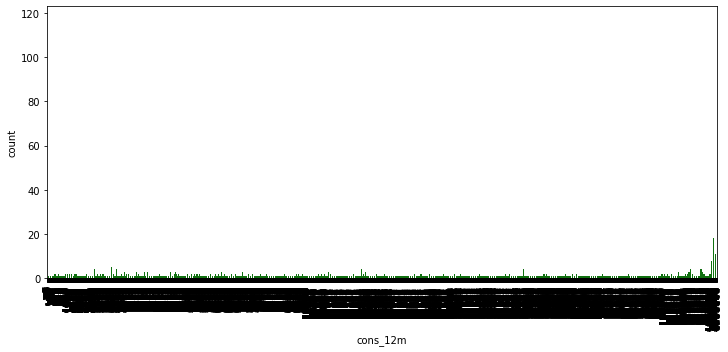

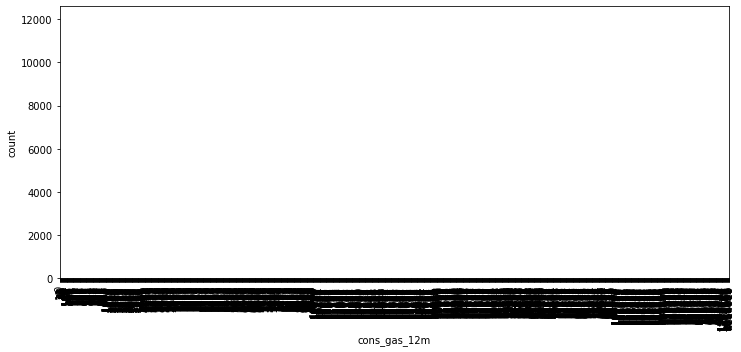

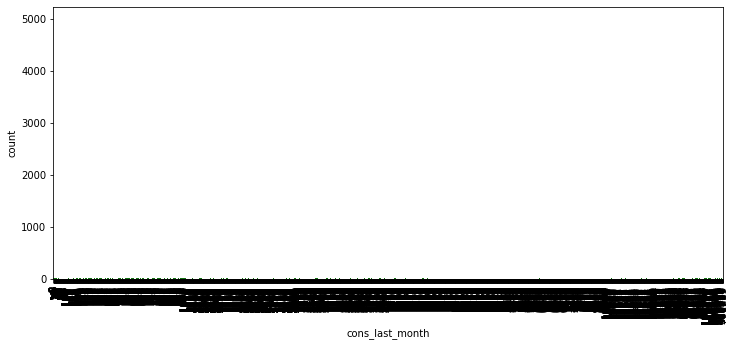

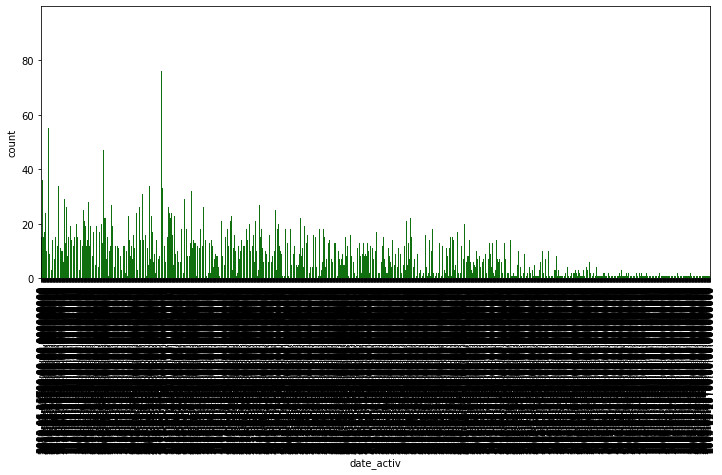

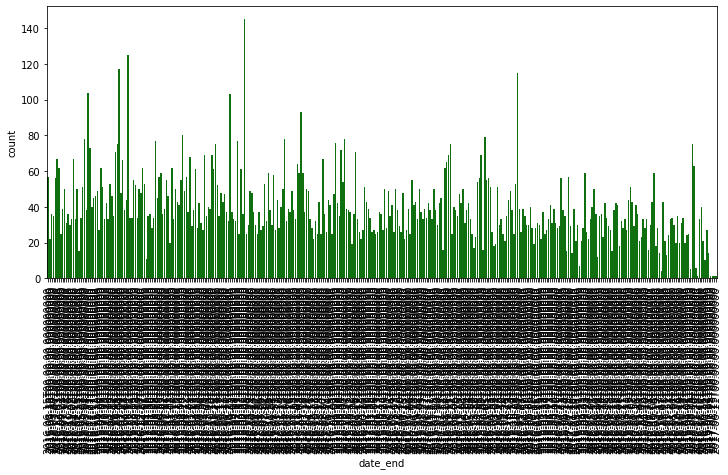

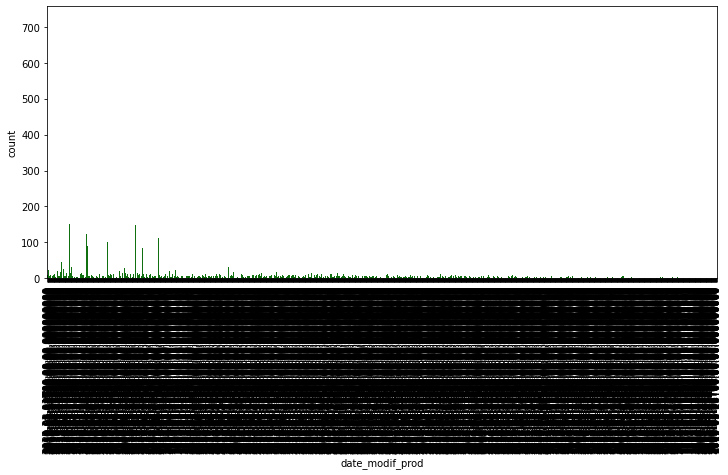

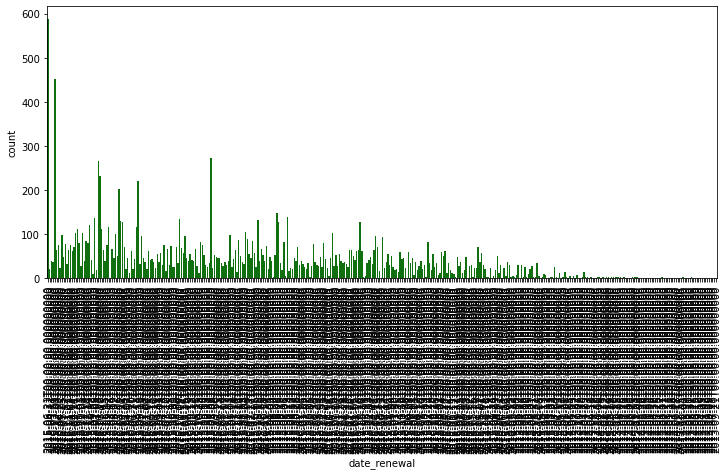

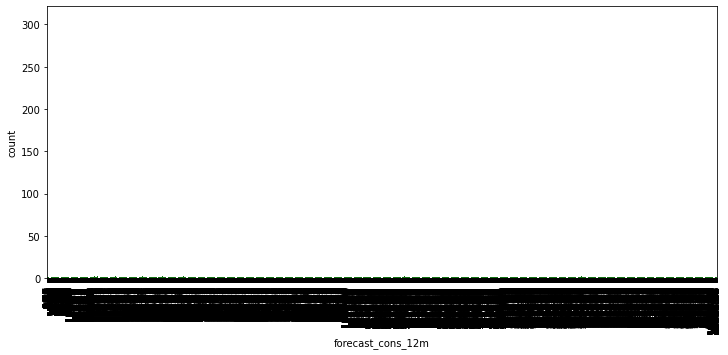

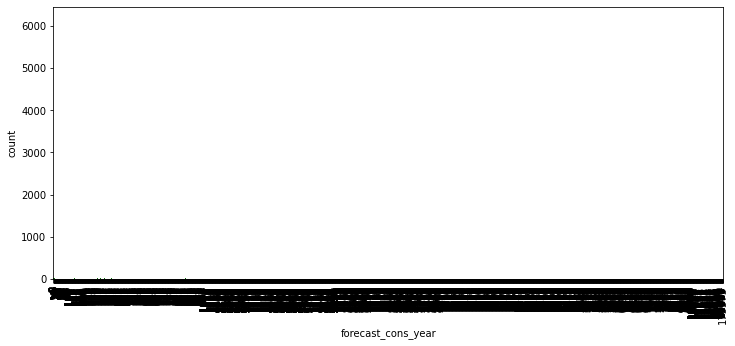

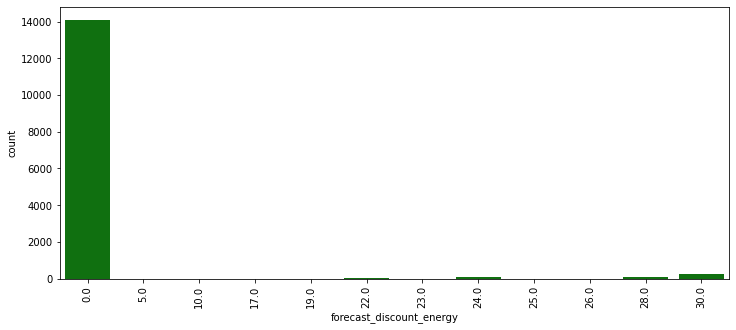

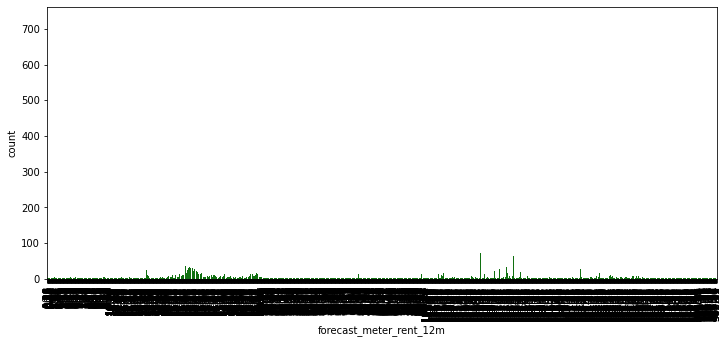

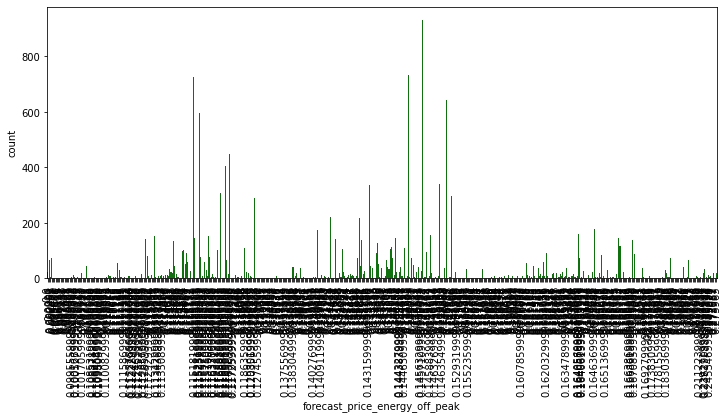

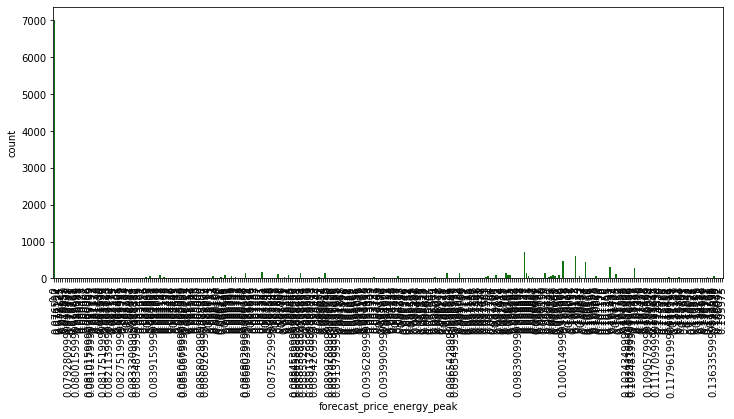

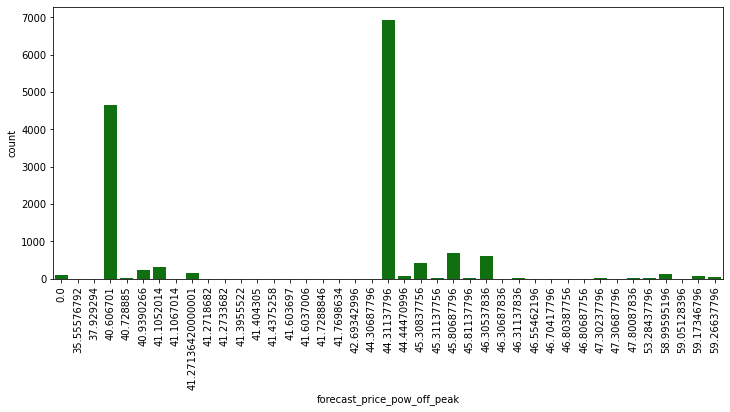

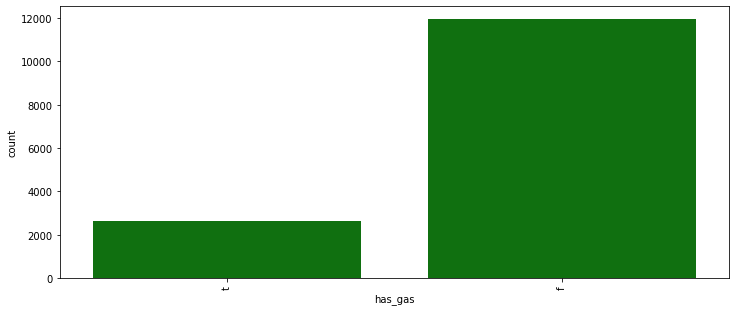

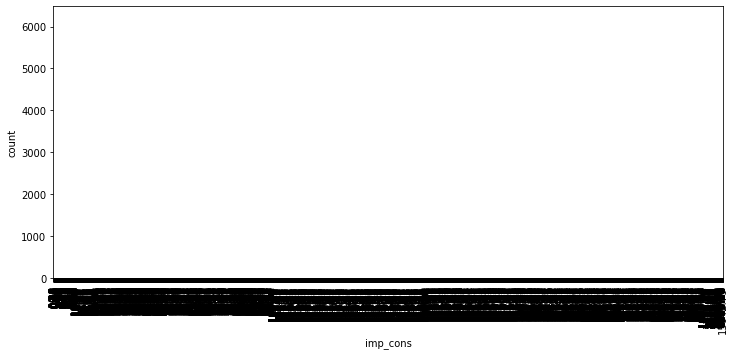

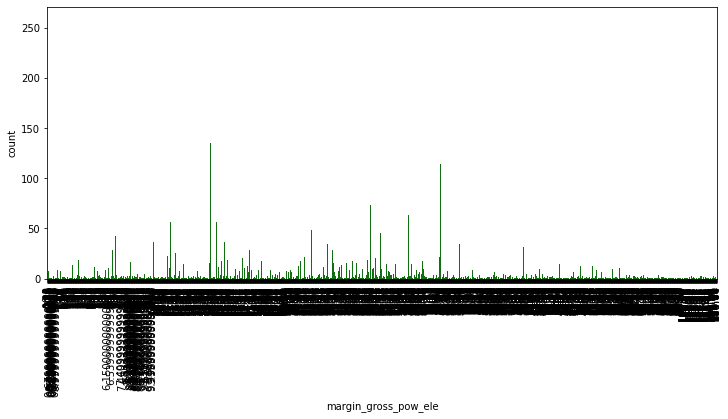

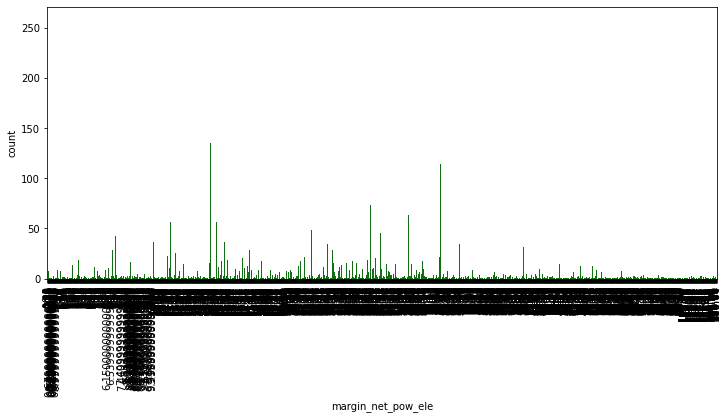

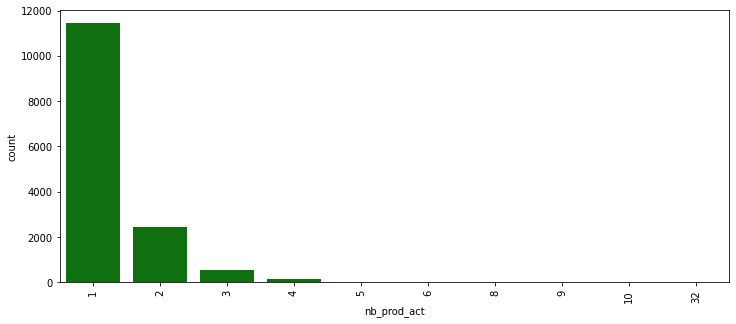

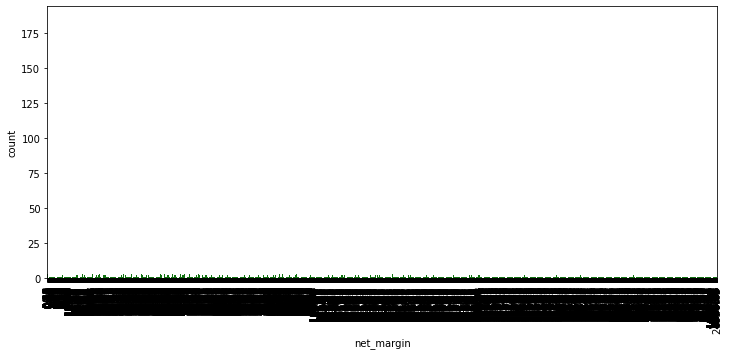

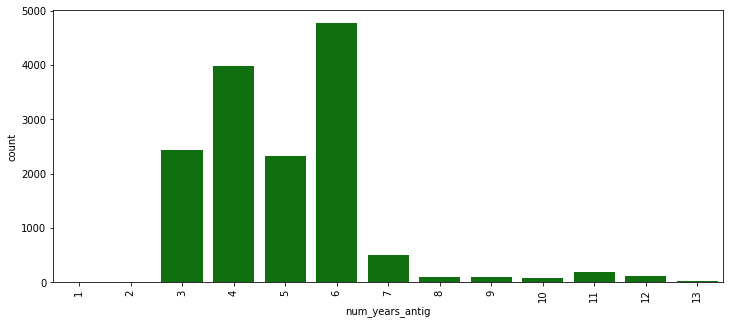

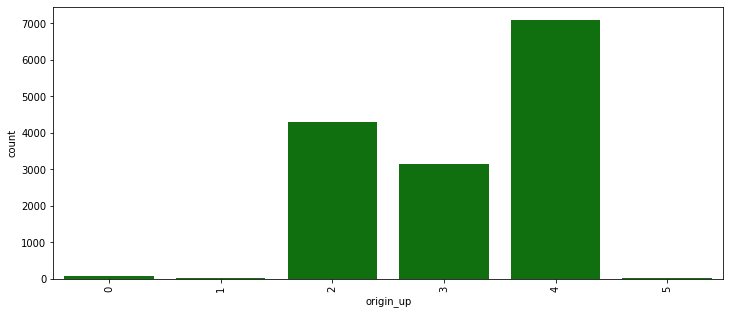

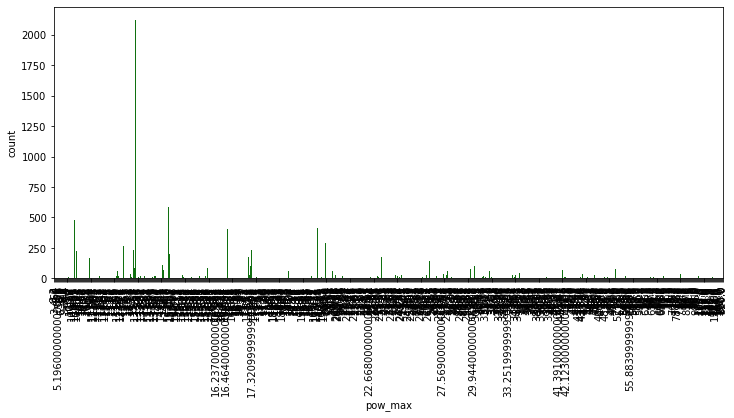

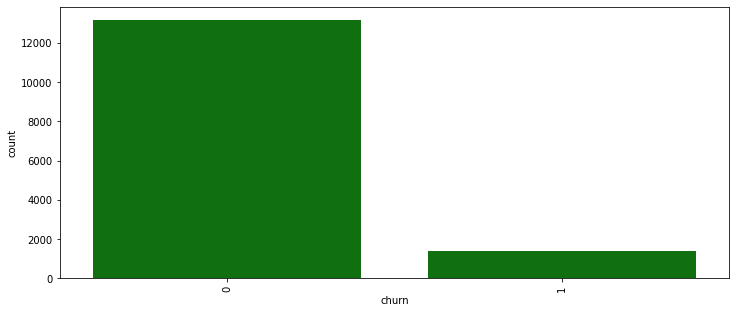

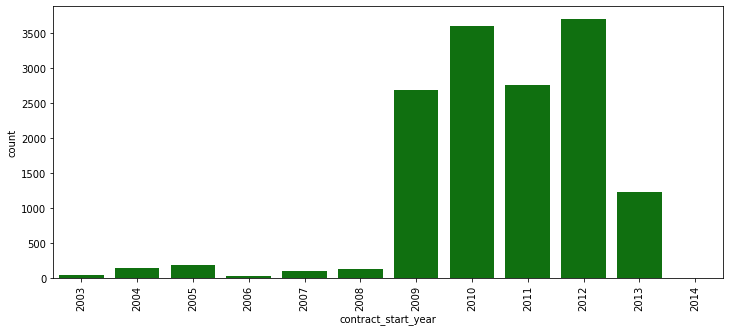

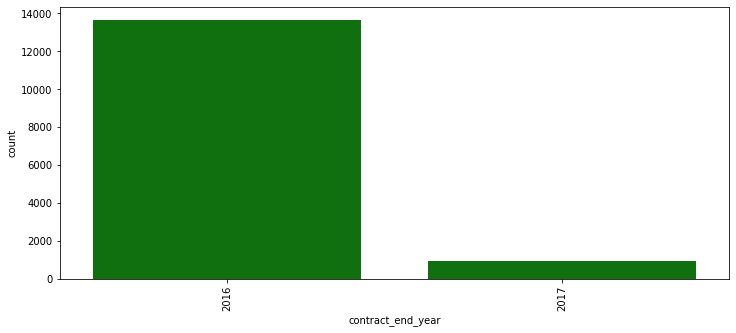

In [49]:
countplot(client_data)

## Bivariate Analysis

### 1. Numerical vs Numerical: 

In [41]:
numerical_columns = client_data.dtypes[client_data.dtypes==np.number].index.tolist()
numerical_columns

['forecast_cons_12m',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'net_margin',
 'pow_max']

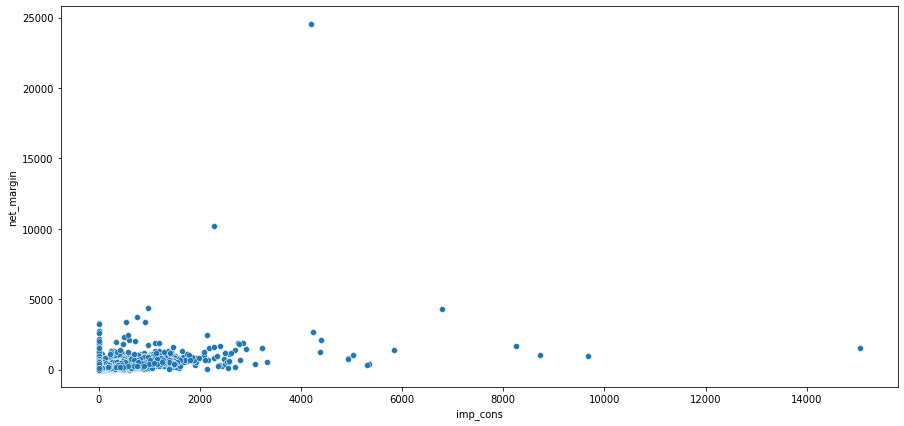

In [42]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=client_data,y='net_margin',x='imp_cons')
plt.show()

### 2. Numerical vs Categorcial

In [43]:
categorical_columns = client_data.dtypes[client_data.dtypes=='object'].index.tolist()
categorical_columns

['id', 'has_gas']

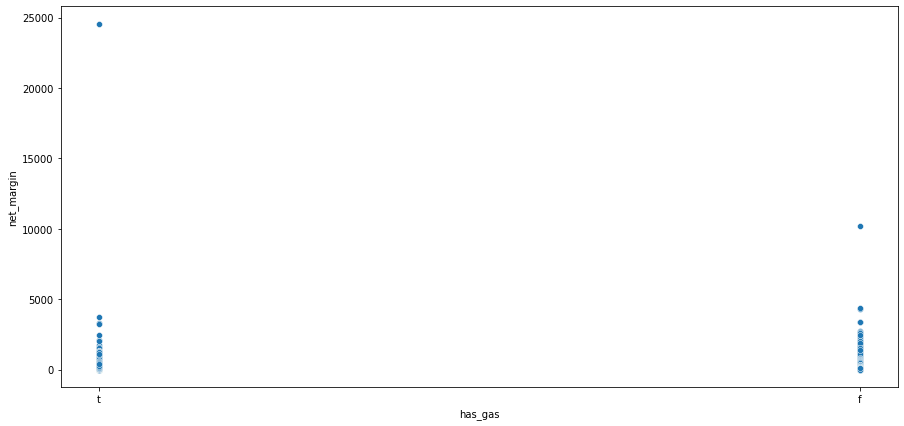

In [44]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=client_data,y='net_margin',x='has_gas')
plt.show()

## Multivariate Analysis

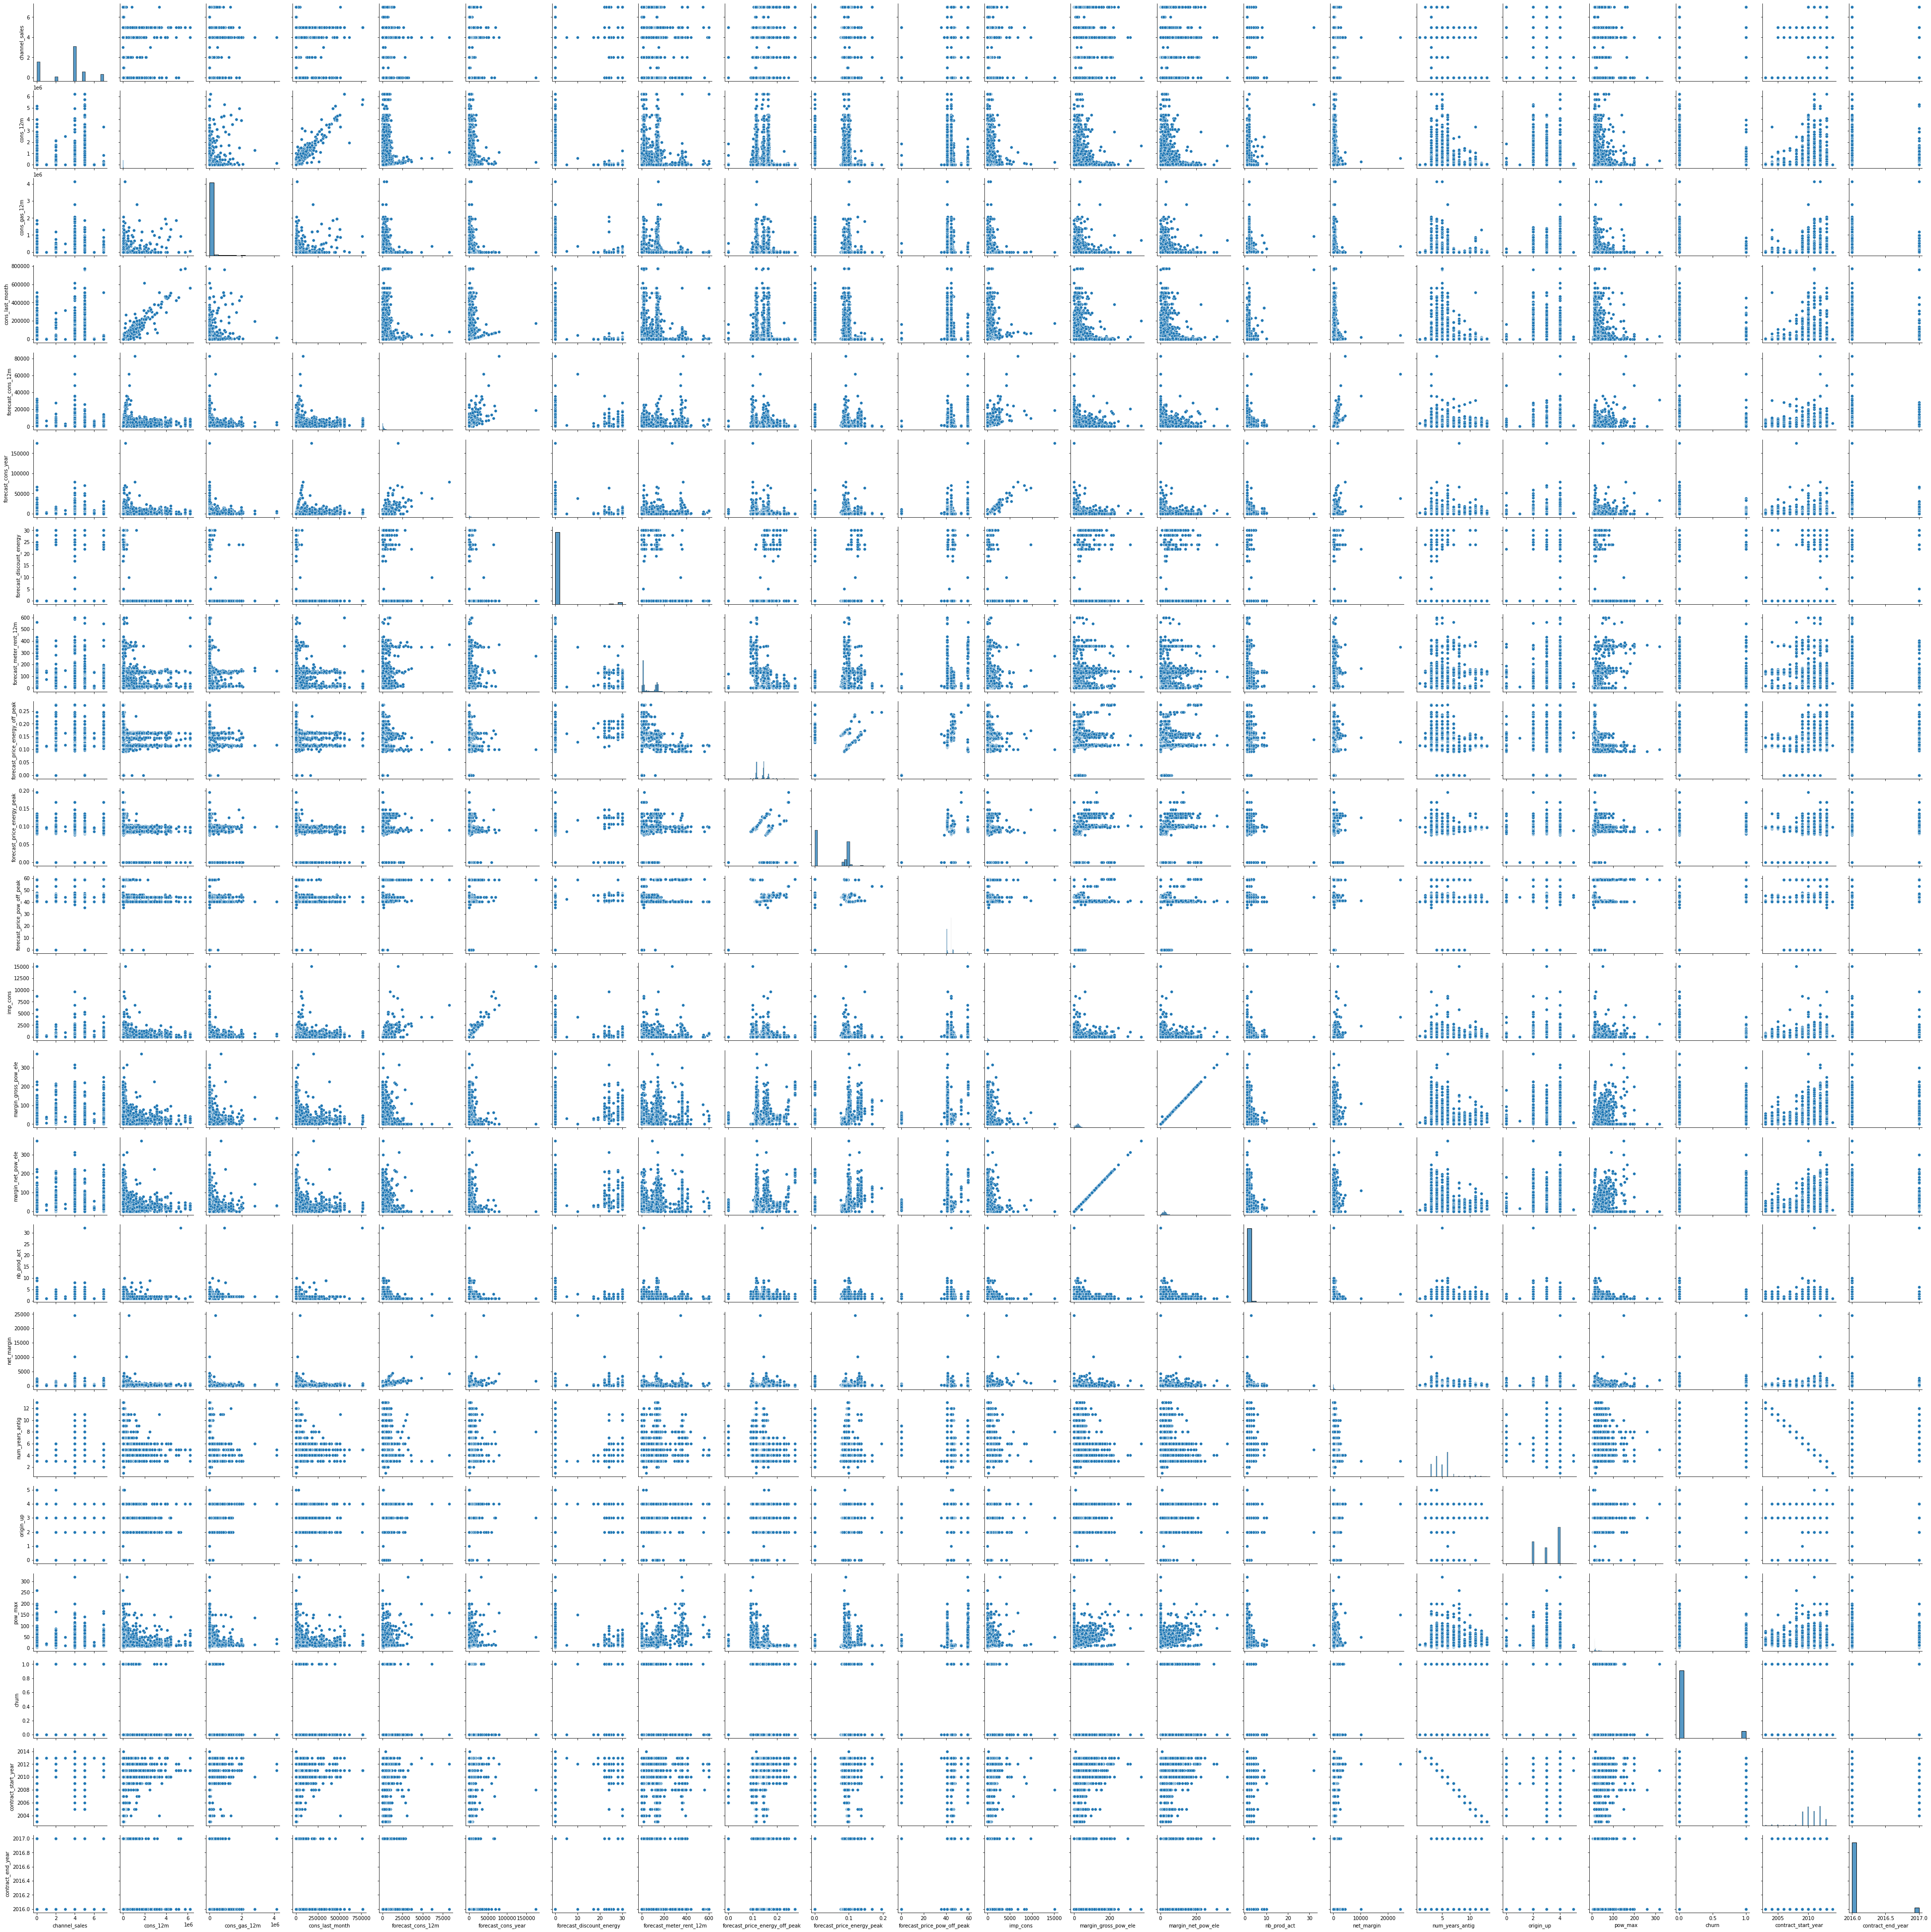

In [74]:
sns.pairplot(client_data)

### Heatmap with Correlation:

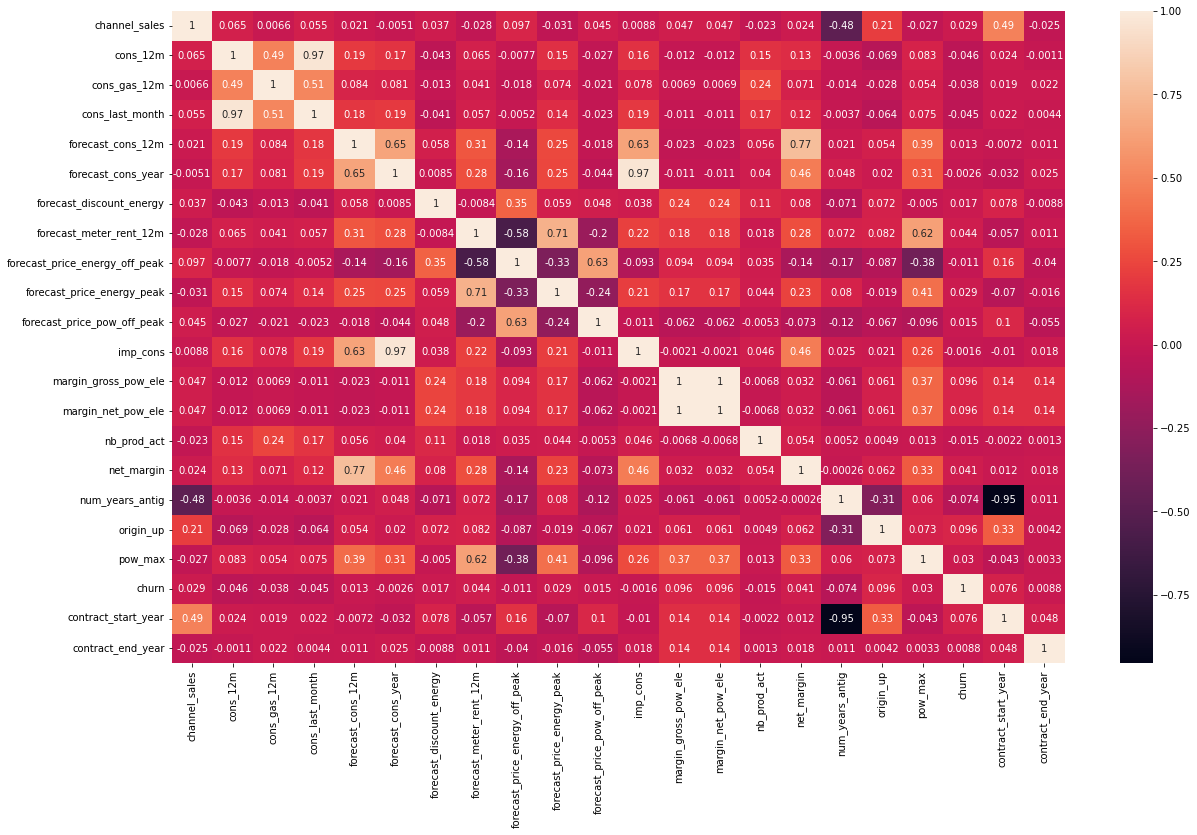

In [71]:
sns.heatmap(client_data.corr(),annot=True)
plt.rcParams['figure.figsize']=[20,20]
plt.show()

### OBSERVATIONS:
1. margin_gross_pow_ele and margin_net_pow_ele are highly correlated.
2. contract_start_year and num_years_antig are poorly(negatively) correlated with eachother.

# price_data:

In [45]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [46]:
categorical_columns = price_data.dtypes[price_data.dtypes=='object'].index.tolist()
categorical_columns

['id', 'price_date']

In [47]:
numerical_columns = price_data.dtypes[price_data.dtypes==np.number].index.tolist()
numerical_columns

['price_off_peak_var',
 'price_peak_var',
 'price_mid_peak_var',
 'price_off_peak_fix',
 'price_peak_fix',
 'price_mid_peak_fix']

In [48]:
price_data.describe().T

count       mean        std  min        25%        50%  \
price_off_peak_var  193002.0   0.141027   0.025032  0.0   0.125976   0.146033   
price_peak_var      193002.0   0.054630   0.049924  0.0   0.000000   0.085483   
price_mid_peak_var  193002.0   0.030496   0.036298  0.0   0.000000   0.000000   
price_off_peak_fix  193002.0  43.334477   5.410297  0.0  40.728885  44.266930   
price_peak_fix      193002.0  10.622875  12.841895  0.0   0.000000   0.000000   
price_mid_peak_fix  193002.0   6.409984   7.773592  0.0   0.000000   0.000000   

                          75%        max  
price_off_peak_var   0.151635   0.280700  
price_peak_var       0.101673   0.229788  
price_mid_peak_var   0.072558   0.114102  
price_off_peak_fix  44.444710  59.444710  
price_peak_fix      24.339581  36.490692  
price_mid_peak_fix  16.226389  17.458221

In [49]:
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

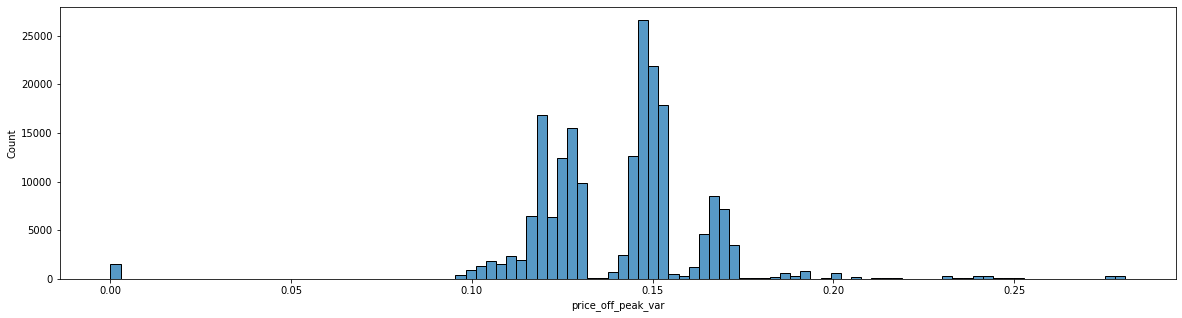

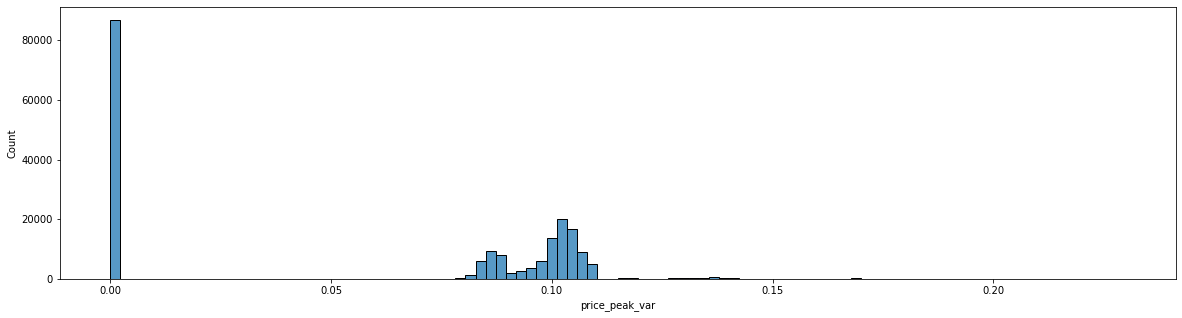

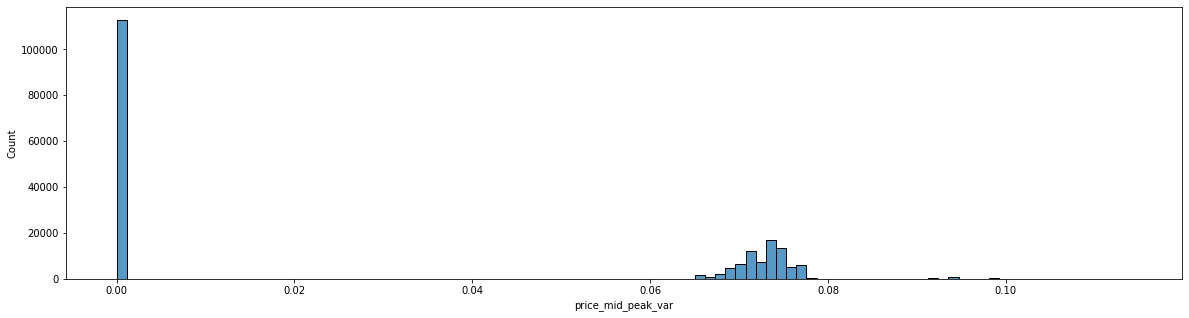

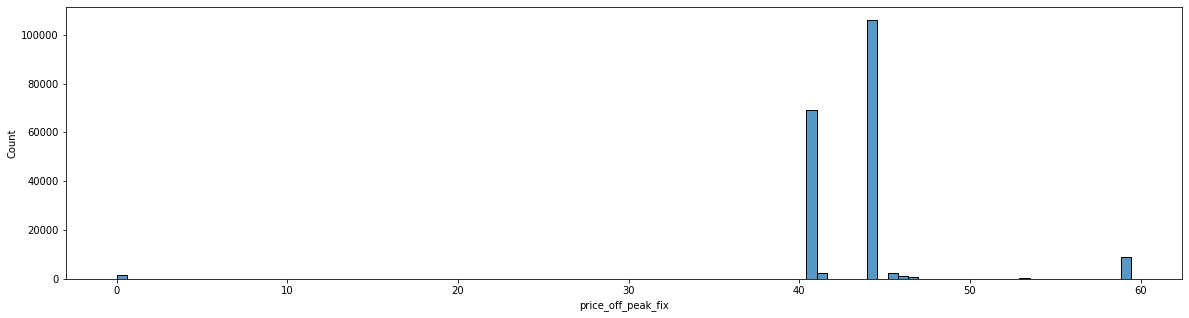

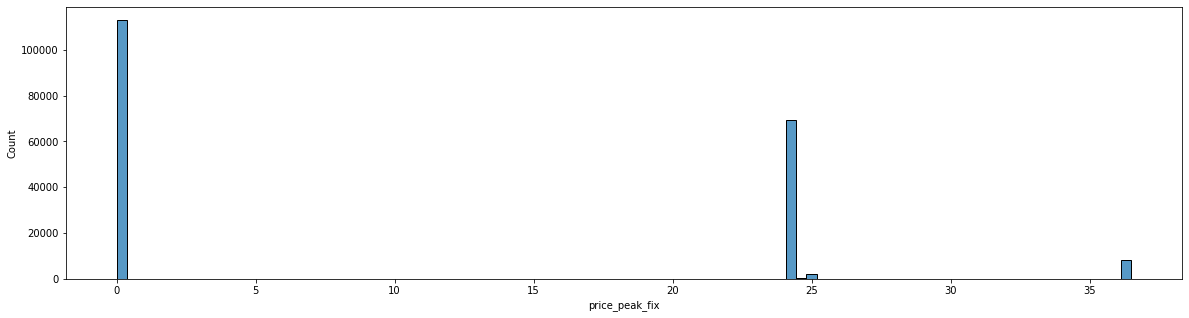

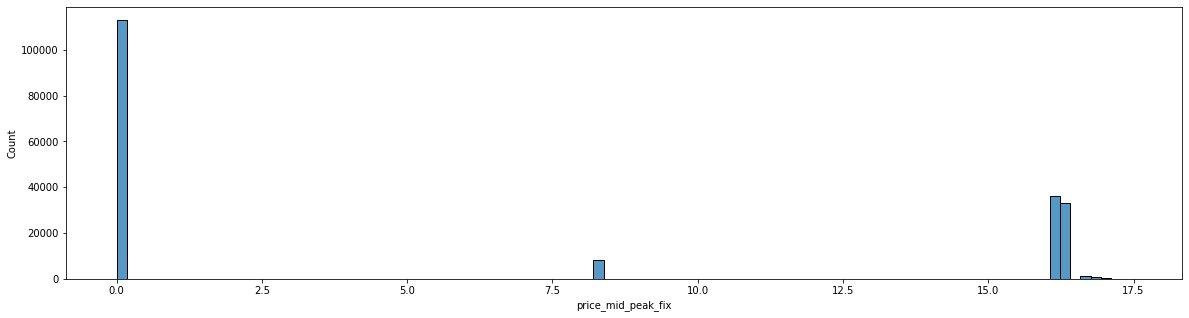

In [50]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_data, target_variable=attr, if_churn=False)

In [51]:
# chaning the datatype to datatime

price_data['price_date'] = pd.to_datetime(price_data['price_date'])

In [52]:
prices = price_data[['price_off_peak_var',
 'price_peak_var',
 'price_mid_peak_var',
 'price_off_peak_fix',
 'price_peak_fix',
 'price_mid_peak_fix']]

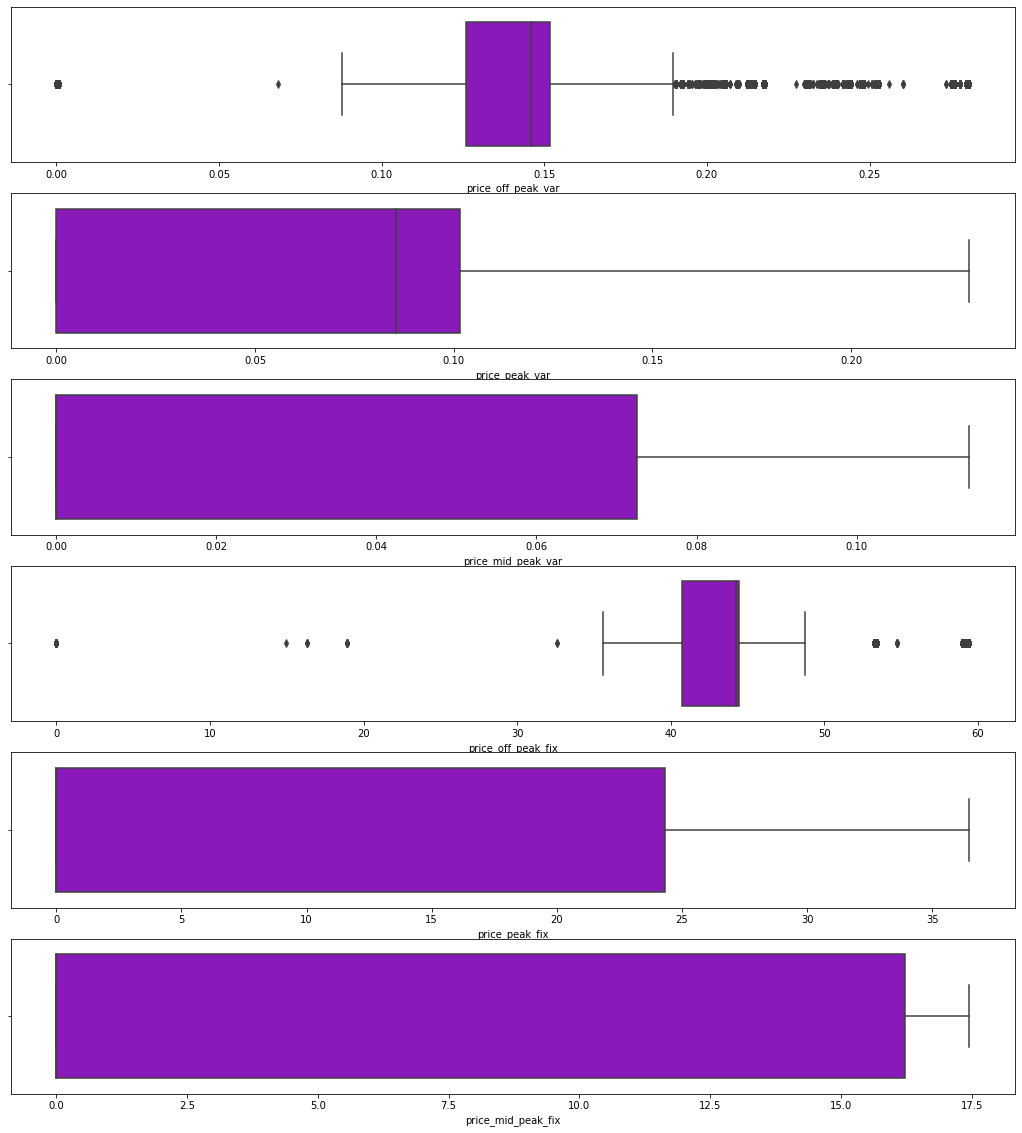

In [53]:
fig, axs = plt.subplots(nrows=6, figsize=(18,20))
# Plot histogram
sns.boxplot(prices["price_off_peak_var"], ax=axs[0],color='darkviolet')
sns.boxplot(prices["price_peak_var"],ax=axs[1],color='darkviolet')
sns.boxplot(prices["price_mid_peak_var"], ax=axs[2],color='darkviolet')
sns.boxplot(prices["price_off_peak_fix"], ax=axs[3],color='darkviolet')
sns.boxplot(prices["price_peak_fix"], ax=axs[4],color='darkviolet')
sns.boxplot(prices["price_mid_peak_fix"], ax=axs[5],color='darkviolet')

# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')

plt.show()

In [54]:
prices.shape

(193002, 6)

In [55]:
# outliers removal

q1=prices.quantile(0.25)
q3=prices.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
df1=prices[~((prices>ul) | (prices<ll)).any(axis=1)]
df1.shape

(179144, 6)

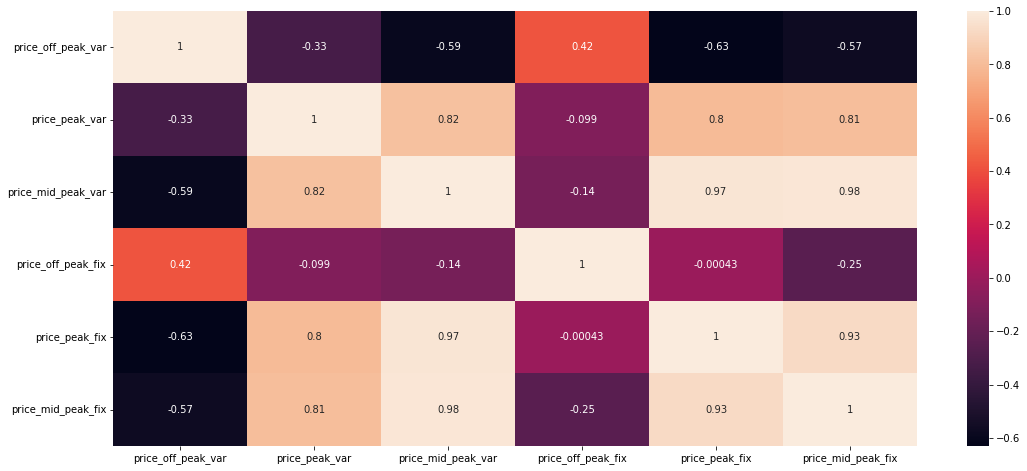

In [56]:
plt.figure(figsize=(18,8))
sns.heatmap(price_data.corr(),annot=True)
plt.show()

#### OBSERVATION:
1. price_off_peak_var and price_mid_peak_var are highly negatively correlated
2. The strongest correlation is between price_mid_peak_var and price_mid_peak_fix

## Sub-Task 2:

- Verify the hypothesis of price sensitivity being to some extent correlated with churn. 
- To define price sensitivity and calculate it. 

- Now, let's check customers sensitivity to price. 

- **NOTE:** Assuming other factors do not change, when the price increases and some cutomers switch, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. But, if there is a decrease or no change in the price and cutomers still change their proveiders.

#### Calculate maximum, minimum and average prices over the whole year

In [57]:
stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price_data.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_,
                                                      'price_off_peak_fix': stat_, 'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})
# flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(3)

id  price_off_peak_var_max  \
0  0002203ffbb812588b632b9e628cc38d                0.128067   
1  0004351ebdd665e6ee664792efc4fd13                0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                0.205742   

   price_off_peak_var_min  price_off_peak_var_mean  price_peak_var_max  \
0                0.119906                 0.124338            0.105842   
1                0.143943                 0.146426            0.000000   
2                0.150837                 0.181558            0.000000   

   price_peak_var_min  price_peak_var_mean  price_mid_peak_var_max  \
0            0.101673             0.103794                0.073773   
1            0.000000             0.000000                0.000000   
2            0.000000             0.000000                0.000000   

   price_mid_peak_var_min  price_mid_peak_var_mean  price_off_peak_fix_max  \
0                0.070232                  0.07316               40.728885   
1                0.000000                  0.00000               44.444710   
2                0.000000                  0.00000               45.944710   

   price_off_peak_fix_min  price_off_peak_fix_mean  price_peak_fix_max  \
0               40.565969                40.701732            24.43733   
1               44.266931                44.385450             0.00000   
2               44.444710                45.319710             0.00000   

   price_peak_fix_min  price_peak_fix_mean  price_mid_peak_fix_max  \
0           24.339581            24.421038               16.291555   
1            0.000000             0.000000                0.000000   
2            0.000000             0.000000                0.000000   

   price_mid_peak_fix_min  price_mid_peak_fix_mean  
0               16.226389                16.280694  
1                0.000000                 0.000000  
2                0.000000                 0.000000

#### Merge client dataset to the price_stat dataset to add churn data

In [58]:
price_analysis = pd.merge(price_stat, client_data[['id', 'churn']], on='id')
price_analysis.head(3)

id  price_off_peak_var_max  \
0  0002203ffbb812588b632b9e628cc38d                0.128067   
1  0004351ebdd665e6ee664792efc4fd13                0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                0.205742   

   price_off_peak_var_min  price_off_peak_var_mean  price_peak_var_max  \
0                0.119906                 0.124338            0.105842   
1                0.143943                 0.146426            0.000000   
2                0.150837                 0.181558            0.000000   

   price_peak_var_min  price_peak_var_mean  price_mid_peak_var_max  \
0            0.101673             0.103794                0.073773   
1            0.000000             0.000000                0.000000   
2            0.000000             0.000000                0.000000   

   price_mid_peak_var_min  price_mid_peak_var_mean  price_off_peak_fix_max  \
0                0.070232                  0.07316               40.728885   
1                0.000000                  0.00000               44.444710   
2                0.000000                  0.00000               45.944710   

   price_off_peak_fix_min  price_off_peak_fix_mean  price_peak_fix_max  \
0               40.565969                40.701732            24.43733   
1               44.266931                44.385450             0.00000   
2               44.444710                45.319710             0.00000   

   price_peak_fix_min  price_peak_fix_mean  price_mid_peak_fix_max  \
0           24.339581            24.421038               16.291555   
1            0.000000             0.000000                0.000000   
2            0.000000             0.000000                0.000000   

   price_mid_peak_fix_min  price_mid_peak_fix_mean  churn  
0               16.226389                16.280694      0  
1                0.000000                 0.000000      0  
2                0.000000                 0.000000      0

#### Calculate the biggest changes in prices over the whole year.

In [59]:
for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']
#
price_stat.head(3)

id  price_off_peak_var_max  \
0  0002203ffbb812588b632b9e628cc38d                0.128067   
1  0004351ebdd665e6ee664792efc4fd13                0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                0.205742   

   price_off_peak_var_min  price_off_peak_var_mean  price_peak_var_max  \
0                0.119906                 0.124338            0.105842   
1                0.143943                 0.146426            0.000000   
2                0.150837                 0.181558            0.000000   

   price_peak_var_min  price_peak_var_mean  price_mid_peak_var_max  \
0            0.101673             0.103794                0.073773   
1            0.000000             0.000000                0.000000   
2            0.000000             0.000000                0.000000   

   price_mid_peak_var_min  price_mid_peak_var_mean  ...  price_peak_fix_mean  \
0                0.070232                  0.07316  ...            24.421038   
1                0.000000                  0.00000  ...             0.000000   
2                0.000000                  0.00000  ...             0.000000   

   price_mid_peak_fix_max  price_mid_peak_fix_min  price_mid_peak_fix_mean  \
0               16.291555               16.226389                16.280694   
1                0.000000                0.000000                 0.000000   
2                0.000000                0.000000                 0.000000   

   diff_max_min_price_off_peak_var  diff_max_min_price_peak_var  \
0                         0.008161                     0.004169   
1                         0.004462                     0.000000   
2                         0.054905                     0.000000   

   diff_max_min_price_mid_peak_var  diff_max_min_price_off_peak_fix  \
0                         0.003541                         0.162916   
1                         0.000000                         0.177779   
2                         0.000000                         1.500000   

   diff_max_min_price_peak_fix  diff_max_min_price_mid_peak_fix  
0                     0.097749                         0.065166  
1                     0.000000                         0.000000  
2                     0.000000                         0.000000  

[3 rows x 25 columns]

#### OBSERVATION:
- Most cutomers' prices did not change much and kept stable.

### Correlation between Churn and Price Analysis:

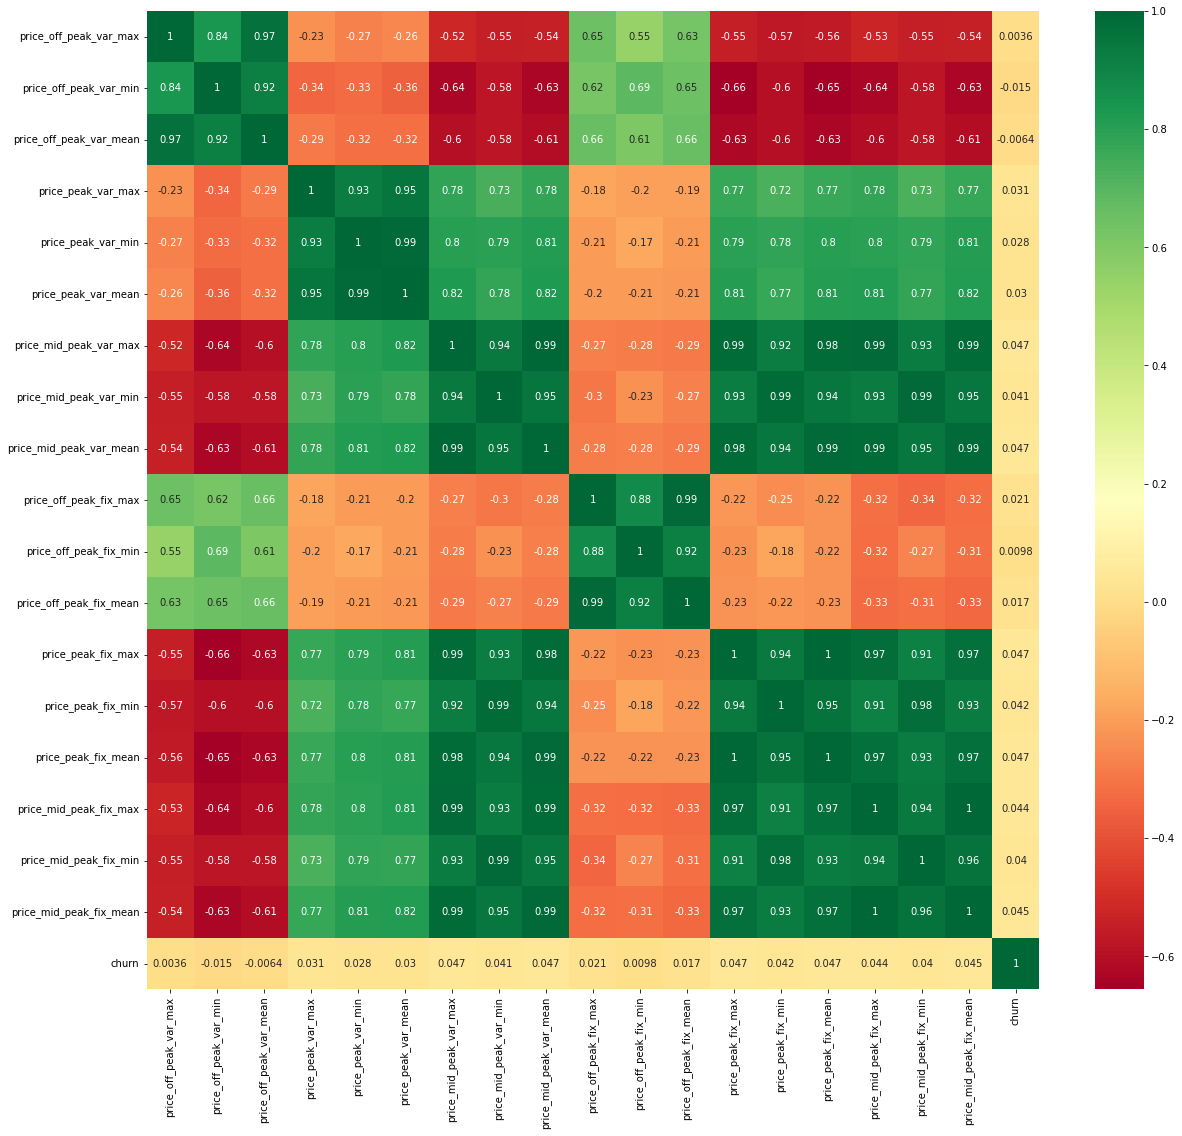

In [60]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            annot = True, cmap='RdYlGn', annot_kws={'size':10})

# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("View of Correlation.png", bbox_inches="tight")
plt.show()

#### OBSERVATION:
1. Although the association with churn is generally quite modest, the correlation plot reveals a higher degree of correlation with other price sensitivity variables. 
2. This suggests that price sensitivity and churn have a shaky linear relationship. 
3. This shows that we might need to develop the feature differently if we want price sensivity to be a significant factor in predicting churn.


In [61]:
merged_data = pd.merge(client_data.drop(columns=['churn']), price_analysis, on='id')
merged_data.head(3)

id  channel_sales  cons_12m  cons_gas_12m  \
0  24011ae4ebbe3035111d65fa7c15bc57              4         0         54946   
1  d29c2c54acc38ff3c0614d0a653813dd              0      4660             0   
2  764c75f661154dac3a6c254cd082ea7d              4       544             0   

   cons_last_month date_activ   date_end date_modif_prod date_renewal  \
0                0 2013-06-15 2016-06-15      2015-11-01   2015-06-23   
1                0 2009-08-21 2016-08-30      2009-08-21   2015-08-31   
2                0 2010-04-16 2016-04-16      2010-04-16   2015-04-17   

   forecast_cons_12m  ...  price_off_peak_fix_max  price_off_peak_fix_min  \
0               0.00  ...                44.26693               40.565969   
1             189.95  ...                44.44471               44.266930   
2              47.96  ...                44.44471               44.266931   

   price_off_peak_fix_mean  price_peak_fix_max  price_peak_fix_min  \
0                40.942265            24.43733                 0.0   
1                44.311375             0.00000                 0.0   
2                44.385450             0.00000                 0.0   

   price_peak_fix_mean price_mid_peak_fix_max  price_mid_peak_fix_min  \
0             22.35201              16.291555                     0.0   
1              0.00000               0.000000                     0.0   
2              0.00000               0.000000                     0.0   

   price_mid_peak_fix_mean  churn  
0                 14.90134      1  
1                  0.00000      0  
2                  0.00000      0  

[3 rows x 46 columns]

In [63]:
merged_data.to_csv("Cleaned_EDA_Data_Task2.csv")

## Sub-Task 3:

- Prepare a half-page summary or slide of key findings and add some suggestions for data augmentation – which other sources of data should the client provide you with and which open source datasets might be useful? 


#### Key findings

1. About 9.72% of customers changed providers.

2. Numeric variables on consumption are highly skewed.

3. Changes in prices does not affect customer churn.

#### Suggestions

1. Competitor price data – If other providers can gave a much better offer than the current provider, customers were more likely to transfer to new provider even if their current prices dropped.

2. Need to clarify what values of zero in price data represent. If the prices of zero stand for free power or energy, what is the reason for that.

3. Other possible factors, such as customer satisfaction. For example, if providers could keep providing excellent customer services, it is very likely a rise in prices will not lead to customer churn.